***
# <br><center>MNIST HANDWRITTEN DIGIT CLASSIFICATION

## <font color="darkcyan"><center>With Keras !!
***

***
## <center><br>Step 1 : Import the Required Libraries and Dataset
***

In [1]:
# General Purpose Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Keras Libraries
import keras

from keras.datasets import mnist

from keras.utils import to_categorical

from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D

Using TensorFlow backend.


***
## <center><br>Step 2 : Import the Required Libraries and Dataset
***

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train has the shape : {}".format(np.shape(x_train)))
print("x_test has the shape : {}".format(np.shape(x_test)))
print("y_train has the shape : {}".format(np.shape(y_train)))
print("y_test has the shape : {}".format(np.shape(y_test)))

x_train has the shape : (60000, 28, 28)
x_test has the shape : (10000, 28, 28)
y_train has the shape : (60000,)
y_test has the shape : (10000,)


***
### <center><br>The Function Above Returns The Following:
***  
- **<font color="red">2 Tuples:**
    - **<font color="red">x_train, x_test</font>**
        - uint8 array of grayscale image data with shape (num_examples, 28, 28)
    - **<font color="red">y_train, y_test</font>**
        - uint8 array of digit labels (integers in range 0-9) with shape (num_examples,)
***
***
    
### <center><br>The Function Above Requires the Arguments:
***
- **<font color="blue">Path:</font>**
    - if you do not have the index file locally (at '~/.keras/datasets/' + path), it will be downloaded to this location
        - Tilde (~) is used to represent the current user's (ec2-user) home directory
***

***
## <center><br>Step 3 : Visualize One Example
***

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

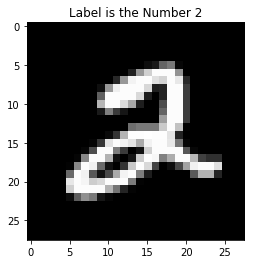

In [3]:
# Change This if You Want To See A Different Example (0-59999 as there are 60000 training examples)
idx = 5

# Include the Label in the Title -- y_train[idx]
plt.title("Label is the Number {}".format(y_train[idx]))

# Display the image -- x_train[idx]
plt.imshow(x_train[idx], cmap="gray")

# Print the Raw Pixel Values for The Image
print(x_train[idx])

***
## <center><br>Step 4 : Normalize
***


Original Output From Row 7 Of The First Example

[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]

----------------------------------------------------------

Normalized Output From Row 7 Of The First Example

[0.         0.         0.         0.         0.         0.
 0.         0.19215686 0.93333333 0.99215686 0.99215686 0.99215686
 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686 0.98431373
 0.36470588 0.32156863 0.32156863 0.21960784 0.15294118 0.
 0.         0.         0.         0.        ]


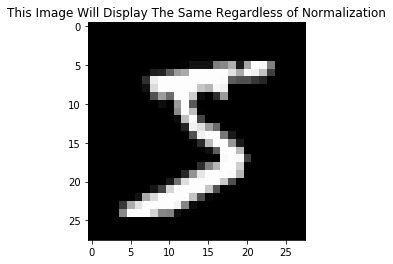

In [4]:
# Print a line from the middle of the first number x_train[0][7] -- PRE-NORMALIZATION
print("\nOriginal Output From Row 7 Of The First Example\n")
print(x_train[0][7])

# To normalize we simply divide all pixel values by 255 so that they all fall between 0 and 1
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)

print("\n----------------------------------------------------------")

# Print a line from the middle of the first number x_train[0][7]  -- POST-NORMALIZATION
print("\nNormalized Output From Row 7 Of The First Example\n")
print(x_train[0][7])

# Show the number so we know what we're working with
plt.title("This Image Will Display The Same Regardless of Normalization")
plt.imshow(x_train[0], cmap='gray')

***
## <center><br>Step 5 : Unroll All The Images <br><br>[---28 x 28---]  ~~~~>  [---784---]
***

In [5]:
print("Old Training and Test Shape : {}".format(np.shape(x_train[0])))
x_train = [x.flatten() for x in x_train]
x_test = [x.flatten() for x in x_test]
print("New Training and Test Shape : {}".format(np.shape(x_train[0])))
x_train = np.array(x_train).astype('float32')
x_test = np.array(x_test).astype('float32')

Old Training and Test Shape : (28, 28)
New Training and Test Shape : (784,)


***
## <center><br>Step 6 : Create A Validation Split In The Testing Data
***

In [6]:
# Now x_val has 5000 examples and x_test has 5000 examples
# We will use x_val to evaluate during training and will save x_test as the holdout (model never sees EVER)
x_val = x_test[0:5000]
x_test = x_test[5000:10000]

y_val = y_test[0:5000]
y_test = y_test[5000:10000]


***
## <center><br>Step 7 : One Hot Encode the Labels
***

In [7]:
print("Original Training and Test Labels : {}".format(y_train[0]))
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


print("New One-Hot-Encoded Training and Test Labels : {}".format(y_train[0]))

Original Training and Test Labels : 5
New One-Hot-Encoded Training and Test Labels : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


***
# <center><br> Done Preprocessing Onto The Various Models
***

***
## <center><br>Model 1 : Basic One Layer Neural Network (SGD)
***

***
## <center><br>Step M1.1 : Define The Model Variable And Add The Layer(s)
***

In [8]:
# create a sequential model
model_1 = models.Sequential()

# Add Just One Layer With A Softmax to The Model (Specify Input Dimension to Be A Number Equal To The Total Number of Pixels)
model_1.add(Dense(10, input_dim=784, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


***
## <center><br>Step M1.2 : Pick Optimizer, Loss, and Other Metrics and Compile The Model
***

In [9]:
# For a multi-class classification problem

# Possible Optimizers
#
#   -  Adadelta    : Adadelta optimizer.
#   -  Adagrad     : Adagrad optimizer.
#   -  Adam        : Adam optimizer.
#   -  Adamax      : Adamax optimizer from Adam paper's Section 7.
#   -  Nadam       : Nesterov Adam optimizer.
#   -  Optimizer   : Abstract optimizer base class.
#   -  RMSprop     : RMSProp optimizer.
#   -  SGD         : Stochastic gradient descent optimizer.

model_1_opt = optimizers.SGD()

# Possible Losses
#
#   -  KLD(...)
#   -  MAE(...)
#   -  MAPE(...)
#   -  MSE(...)
#   -  MSLE(...)
#   -  binary_crossentropy(...)
#   -  categorical_crossentropy(...)
#   -  categorical_hinge(...)
#   -  cosine(...)
#   -  cosine_proximity(...)
#   -  deserialize(...)
#   -  get(...)
#   -  hinge(...)
#   -  kld(...)
#   -  kullback_leibler_divergence(...)
#   -  logcosh(...): Logarithm of the hyperbolic cosine of the prediction error.
#   -  mae(...)
#   -  mape(...)
#   -  mean_absolute_error(...)
#   -  mean_absolute_percentage_error(...)
#   -  mean_squared_error(...)
#   -  mean_squared_logarithmic_error(...)
#   -  mse(...)
#   -  msle(...)
#   -  poisson(...)
#   -  RMSprop(...)
#   -  serialize(...)
#   -  sparse_categorical_crossentropy(...)
#   -  squared_hinge(...)

model_1_loss = losses.categorical_crossentropy

# Possible Metrics
#
#   -  binary_accuracy
#   -  categorical_accuracy
#   -  sparse_categorical_accuracy
#   -  top_k_categorical_accuracy
#   -  sparse_top_k_categorical_accuracy
#   -  In addition to the metrics above, you may use any of the loss functions described in the loss function page as metrics
#   -  Custom metrics are also available

model_1_metrics = [metrics.categorical_accuracy]

# -------------------------------------------------------------------------------

model_1.compile(optimizer=model_1_opt,
              loss=model_1_loss,
              metrics=model_1_metrics)


# -------------------------------------------------------------------------------

In [10]:
print(model_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


***
## <center><br>Step M1.3 : Fit The Model
***

In [11]:
# Number of Epochs Can Be Low (Won't Take Long To Train At This Complexity)
history_1 = model_1.fit(x_train, 
                y_train,
                validation_data = (x_val, y_val),
                batch_size=128,
                epochs=40)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 5000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 70us/step - loss: 1.3050 - categorical_accuracy: 0.6892 - val_loss: 0.9236 - val_categorical_accuracy: 0.7964
Epoch 2/40
60000/60000 [==============================] - 1s 16us/step - loss: 0.7165 - categorical_accuracy: 0.8417 - val_loss: 0.7152 - val_categorical_accuracy: 0.8314
Epoch 3/40
60000/60000 [==============================] - 1s 16us/step - loss: 0.5856 - categorical_accuracy: 0.8610 - val_loss: 0.6305 - val_categorical_accuracy: 0.8412
Epoch 4/40
60000/60000 [==============================] - 1s 17us/step - loss: 0.5234 - categorical_accuracy: 0.8701 - val_loss: 0.5821 - val_categorical_accuracy: 0.8500
Epoch 5/40
60000/60000 [==============================] - 1s 17us/step - loss: 0.4858 - categorical_accuracy: 0.8764 - val_loss: 0.5500 - val_categorical_accuracy: 0.8562
Epoch 6/40
60000/60000 [========================

***
## <center><br>Step M1.4 : Plot Model Curves
***

Text(0.5,0,'Epoch #')

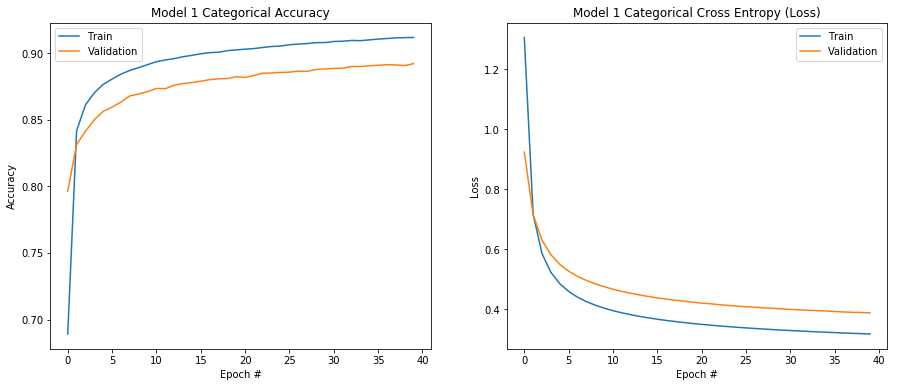

In [12]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(15,6))

# plt.subplot lets you plot multiple graphs...
# The arguments are plt.subplot(total_rows, total_columns, this_graph_number)
# So if you want 4 graphs two on the first line and two on the second then you'd call each plot as follows:
#
# UPPER  LEFT   PLOT = plt.subplot(2,2,1) 
# UPPER  RIGHT  PLOT = plt.subplot(2,2,2) 
# LOWER  LEFT   PLOT = plt.subplot(2,2,3) 
# LOWER  RIGHT  PLOT = plt.subplot(2,2,4) 

plt.subplot(1,2,1)
plt.plot(history_1.history['categorical_accuracy'])
plt.plot(history_1.history['val_categorical_accuracy'])
plt.title('Model 1 Categorical Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')

plt.subplot(1,2,2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model 1 Categorical Cross Entropy (Loss)')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch #')

***
## <center><br>Step M1.5 : See How The Model Does On The Held Out Test Data
***

In [13]:
score = model_1.evaluate(x_test, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

5000/5000 [==============================] - 0s 9us/step

----------------------------------------------

Accuracy On Test Data is : 0.939
Loss On Test Data is : 0.22251761268377304


***
## <center><br>Step M1.6 : See Misclassified Examples and Correctly Classified Examples
***

In [14]:
test_predictions = model_1.predict(x_test)
test_result = np.absolute(y_test-test_predictions)
test_result = [np.round(np.sum(result)) for result in test_result]

really_wrong_list = []
wrong_list = []
right_but_barely_list = []
correct_list = []

for i in range(len(test_result)):
        if (test_result[i] == 2.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            really_wrong_list.append(i)
        elif (test_result[i] == 1.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            wrong_list.append(i)
        elif (test_result[i] > 0) and (np.argmax(test_predictions[i]) == np.argmax(y_test[i])):
            right_but_barely_list.append(i)
        else:
            correct_list.append(i)

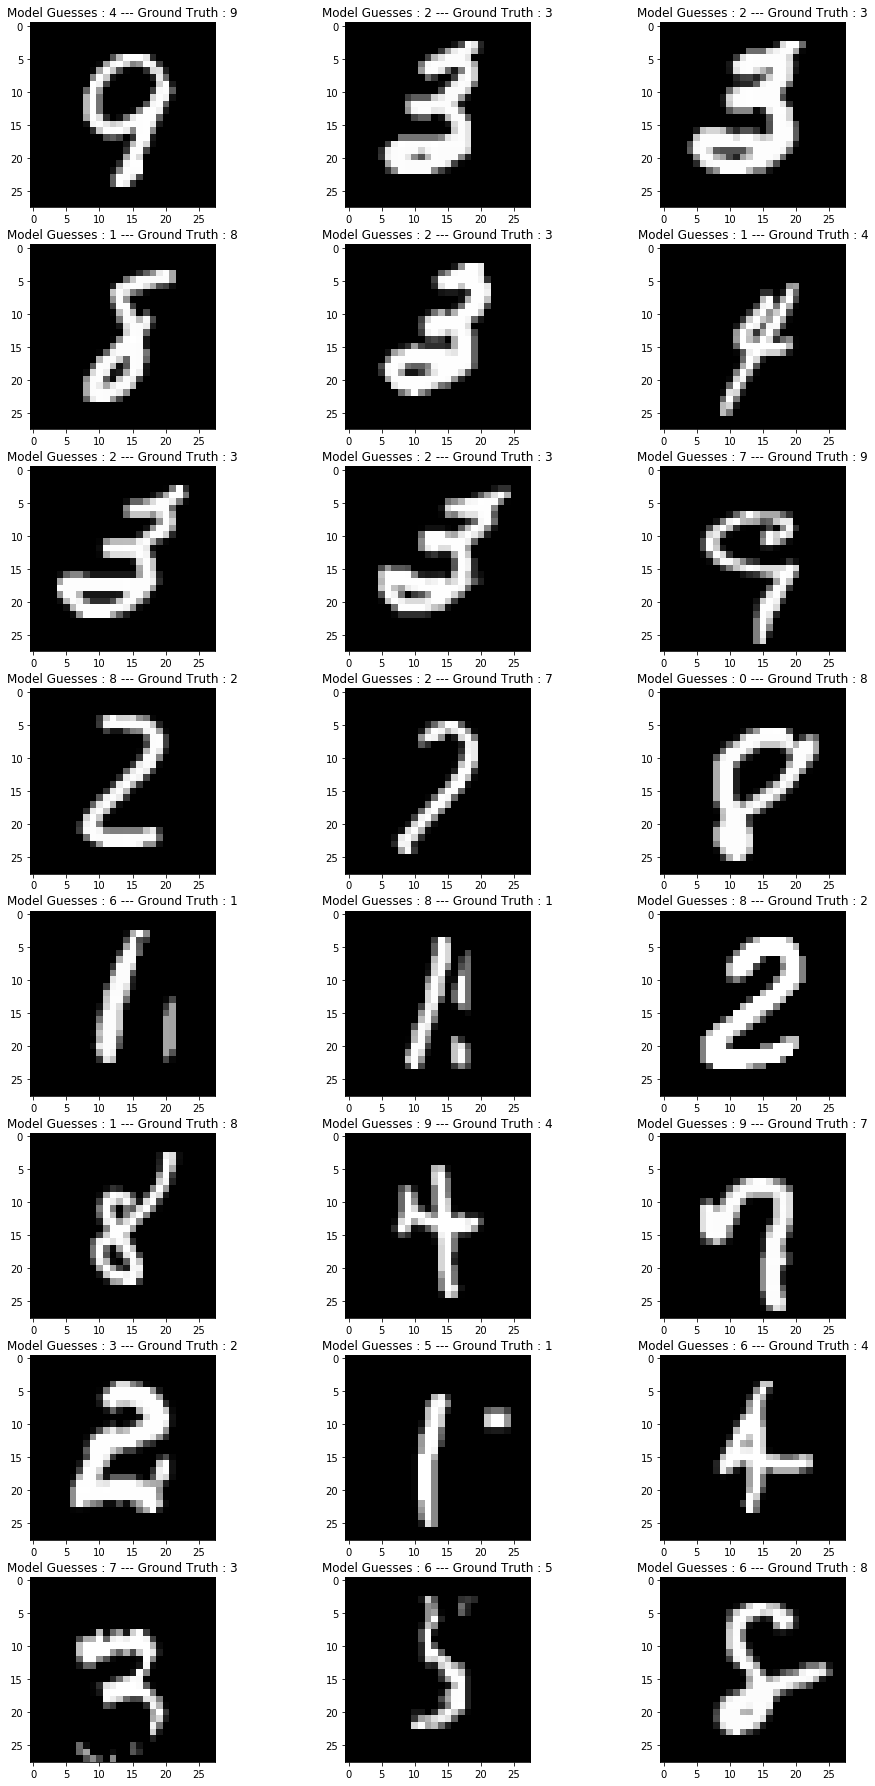

In [15]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(really_wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_1.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Badly Misclassified    
***

# <br><center>Examples Below Are Closer But Still Wrong
***

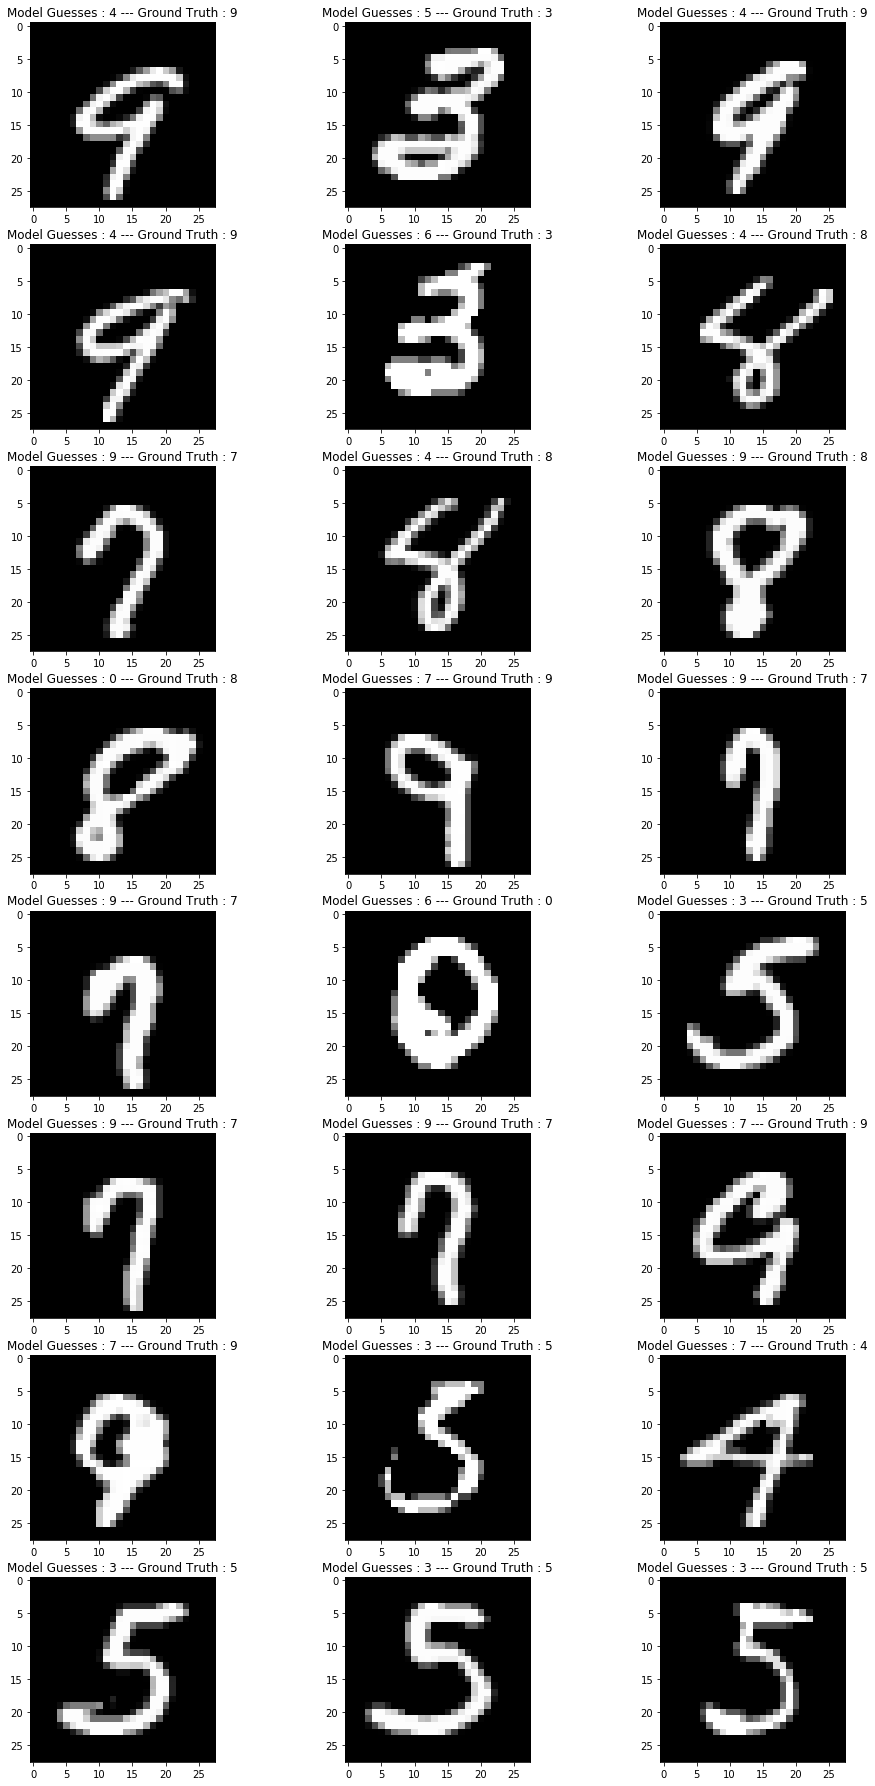

In [16]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_1.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
***
***
***

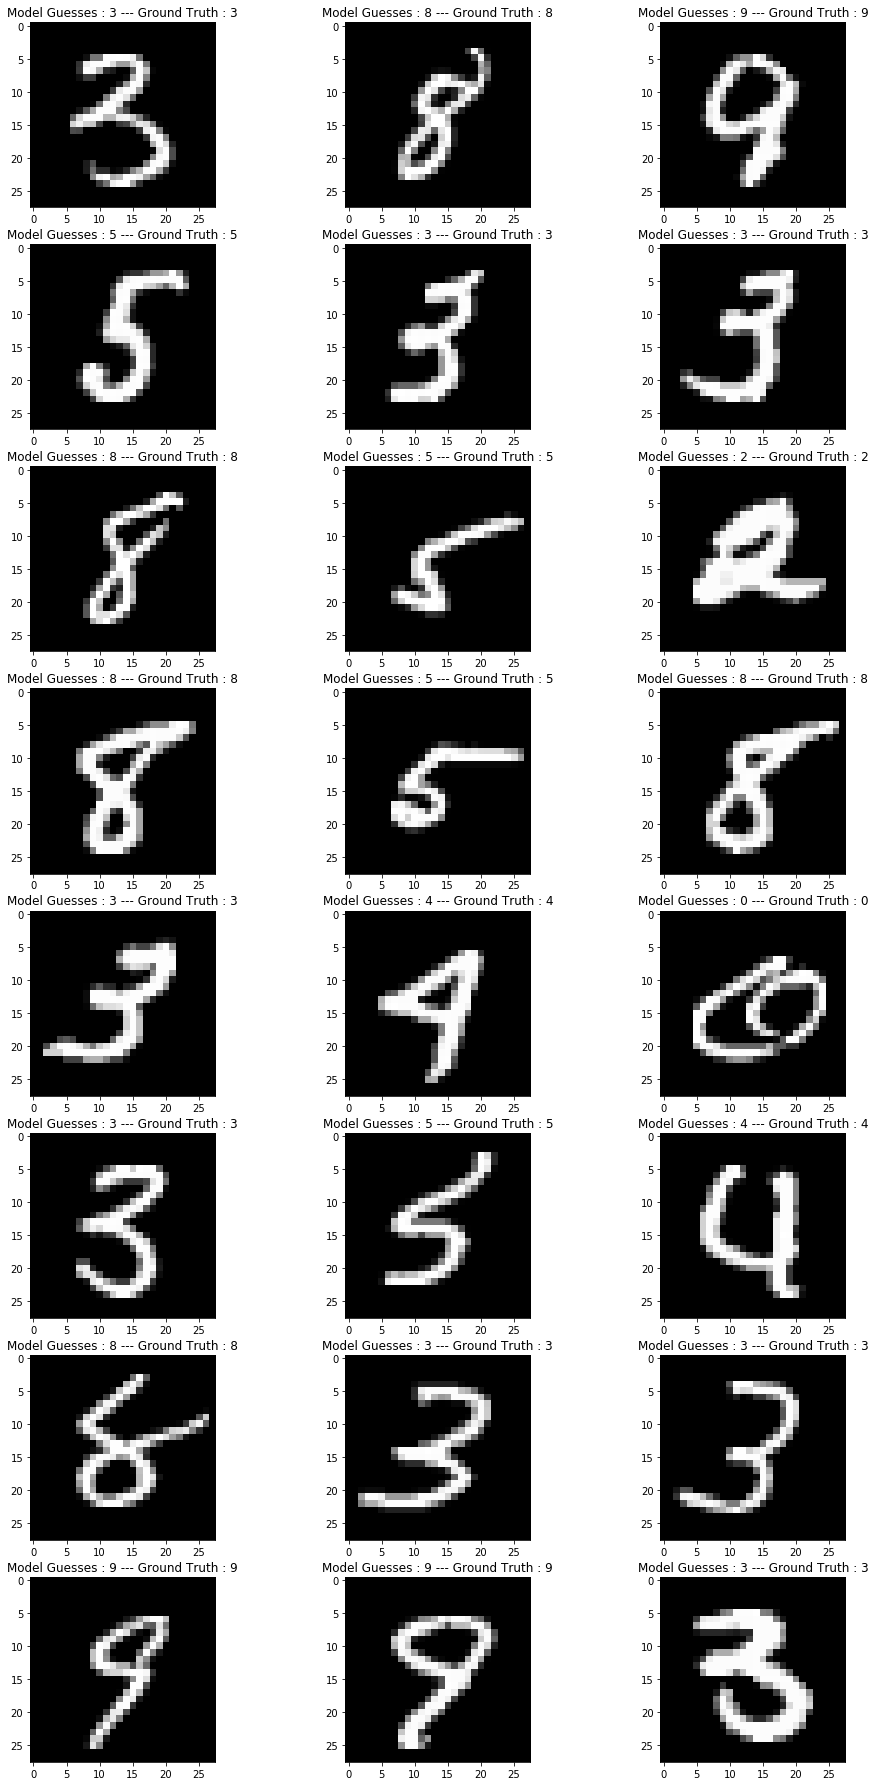

In [17]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16, 32))

for i, ex in enumerate(right_but_barely_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_1.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Close To Being Misclassified    
***

# <br><center>Examples Below Are Confidently Correctly Classified
***

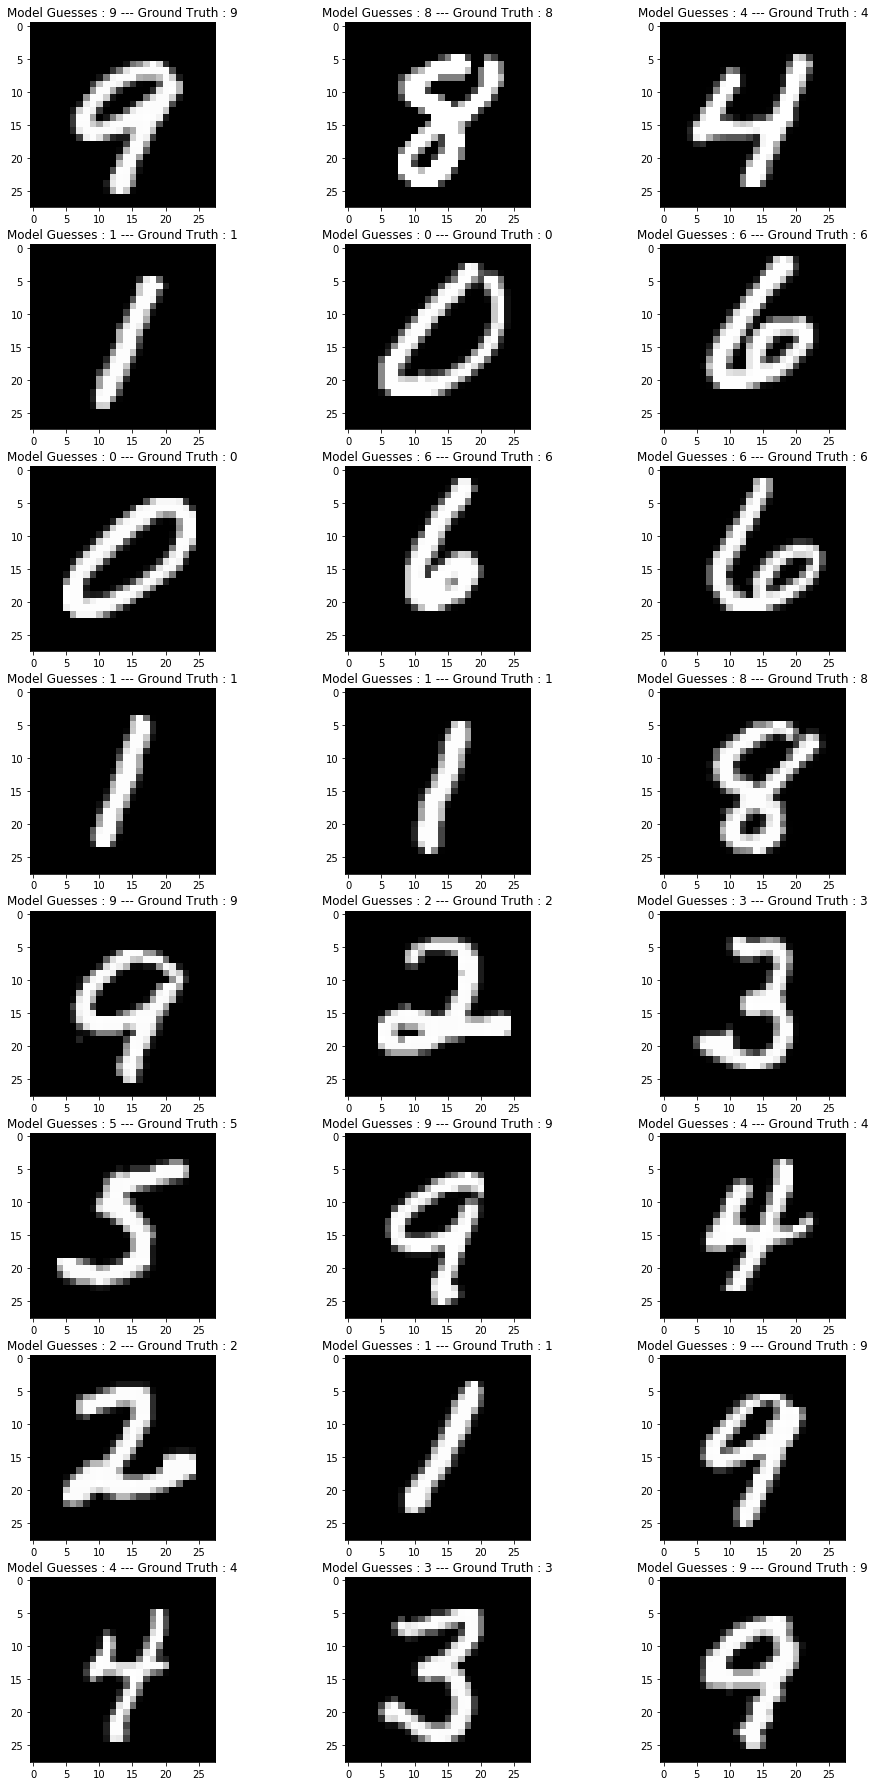

In [18]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(correct_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_1.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
## <center><br>Model 2 : Basic 5 Layer Neural Network (Multi Layer Perceptron)
***

***
## <center><br>Step M2.1 : Define The Model Variable And Add The Layer(s)
***

In [19]:
# create a sequential model
model_2 = models.Sequential()

model_2.add(Dense(200, input_dim=784, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_2.add(Dense(100, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_2.add(Dense(60, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_2.add(Dense(30, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_2.add(Dense(10, activation='softmax'))

***
## <center><br>Step M2.2 : Pick Optimizer, Loss, and Other Metrics and Compile The Model
***

In [20]:
# For a multi-class classification problem

# Possible Optimizers
#
#   -  Adadelta    : Adadelta optimizer.
#   -  Adagrad     : Adagrad optimizer.
#   -  Adam        : Adam optimizer.
#   -  Adamax      : Adamax optimizer from Adam paper's Section 7.
#   -  Nadam       : Nesterov Adam optimizer.
#   -  Optimizer   : Abstract optimizer base class.
#   -  RMSprop     : RMSProp optimizer.
#   -  SGD         : Stochastic gradient descent optimizer.

model_2_opt = optimizers.SGD()

# Possible Losses
#
#   -  KLD(...)
#   -  MAE(...)
#   -  MAPE(...)
#   -  MSE(...)
#   -  MSLE(...)
#   -  binary_crossentropy(...)
#   -  categorical_crossentropy(...)
#   -  categorical_hinge(...)
#   -  cosine(...)
#   -  cosine_proximity(...)
#   -  deserialize(...)
#   -  get(...)
#   -  hinge(...)
#   -  kld(...)
#   -  kullback_leibler_divergence(...)
#   -  logcosh(...): Logarithm of the hyperbolic cosine of the prediction error.
#   -  mae(...)
#   -  mape(...)
#   -  mean_absolute_error(...)
#   -  mean_absolute_percentage_error(...)
#   -  mean_squared_error(...)
#   -  mean_squared_logarithmic_error(...)
#   -  mse(...)
#   -  msle(...)
#   -  poisson(...)
#   -  RMSprop(...)
#   -  serialize(...)
#   -  sparse_categorical_crossentropy(...)
#   -  squared_hinge(...)

model_2_loss = losses.categorical_crossentropy

# Possible Metrics
#
#   -  binary_accuracy
#   -  categorical_accuracy
#   -  sparse_categorical_accuracy
#   -  top_k_categorical_accuracy
#   -  sparse_top_k_categorical_accuracy
#   -  In addition to the metrics above, you may use any of the loss functions described in the loss function page as metrics
#   -  Custom metrics are also available

model_2_metrics = [metrics.categorical_accuracy]

# -------------------------------------------------------------------------------

model_2.compile(optimizer=model_2_opt,
                loss=model_2_loss,
                metrics=model_2_metrics)


# -------------------------------------------------------------------------------

In [21]:
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________
None


***
## <center><br>Step M2.3 : Fit The Model
***

In [22]:
# Number of Epochs Can Be Low (Won't Take Long To Train At This Complexity)
history_2 = model_2.fit(x_train, 
                        y_train,
                        validation_data = (x_val, y_val),
                        batch_size=128,
                        epochs=40)

Train on 60000 samples, validate on 5000 samples
Epoch 1/40
60000/60000 [==============================] - 2s 26us/step - loss: 2.2947 - categorical_accuracy: 0.1384 - val_loss: 2.2843 - val_categorical_accuracy: 0.1584
Epoch 2/40
60000/60000 [==============================] - 1s 21us/step - loss: 2.2369 - categorical_accuracy: 0.3059 - val_loss: 2.1532 - val_categorical_accuracy: 0.3960
Epoch 3/40
60000/60000 [==============================] - 1s 21us/step - loss: 1.7999 - categorical_accuracy: 0.4366 - val_loss: 1.4133 - val_categorical_accuracy: 0.5140
Epoch 4/40
60000/60000 [==============================] - 1s 21us/step - loss: 1.0654 - categorical_accuracy: 0.6535 - val_loss: 0.9758 - val_categorical_accuracy: 0.6898
Epoch 5/40
60000/60000 [==============================] - 1s 21us/step - loss: 0.7500 - categorical_accuracy: 0.7715 - val_loss: 0.7444 - val_categorical_accuracy: 0.7694
Epoch 6/40
60000/60000 [==============================] - 1s 21us/step - loss: 0.5764 - categori

***
## <center><br>Step M2.4 : Plot Model Curves
***

Text(0.5,0,'Epoch #')

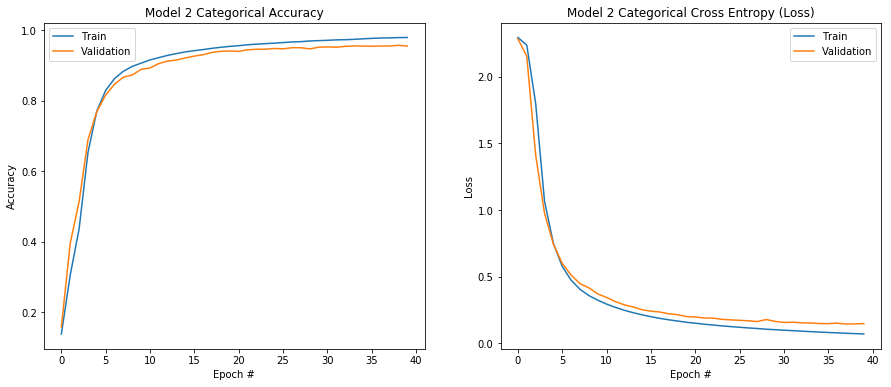

In [23]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(15,6))

# plt.subplot lets you plot multiple graphs...
# The arguments are plt.subplot(total_rows, total_columns, this_graph_number)
# So if you want 4 graphs two on the first line and two on the second then you'd call each plot as follows:
#
# UPPER  LEFT   PLOT = plt.subplot(2,2,1) 
# UPPER  RIGHT  PLOT = plt.subplot(2,2,2) 
# LOWER  LEFT   PLOT = plt.subplot(2,2,3) 
# LOWER  RIGHT  PLOT = plt.subplot(2,2,4) 

plt.subplot(1,2,1)
plt.plot(history_2.history['categorical_accuracy'])
plt.plot(history_2.history['val_categorical_accuracy'])
plt.title('Model 2 Categorical Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')

plt.subplot(1,2,2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model 2 Categorical Cross Entropy (Loss)')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch #')

***
## <center><br>Step M2.5 : See How The Model Does On The Held Out Test Data
***

In [24]:
score = model_2.evaluate(x_test, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

5000/5000 [==============================] - 0s 11us/step

----------------------------------------------

Accuracy On Test Data is : 0.9752
Loss On Test Data is : 0.09067653642743825


***
## <center><br>Step M2.6 : See Misclassified Examples and Correctly Classified Examples
***

In [25]:
test_predictions = model_2.predict(x_test)
test_result = np.absolute(y_test-test_predictions)
test_result = [np.round(np.sum(result)) for result in test_result]

really_wrong_list = []
wrong_list = []
right_but_barely_list = []
correct_list = []

for i in range(len(test_result)):
        if (test_result[i] == 2.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            really_wrong_list.append(i)
        elif (test_result[i] == 1.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            wrong_list.append(i)
        elif (test_result[i] > 0) and (np.argmax(test_predictions[i]) == np.argmax(y_test[i])):
            right_but_barely_list.append(i)
        else:
            correct_list.append(i)

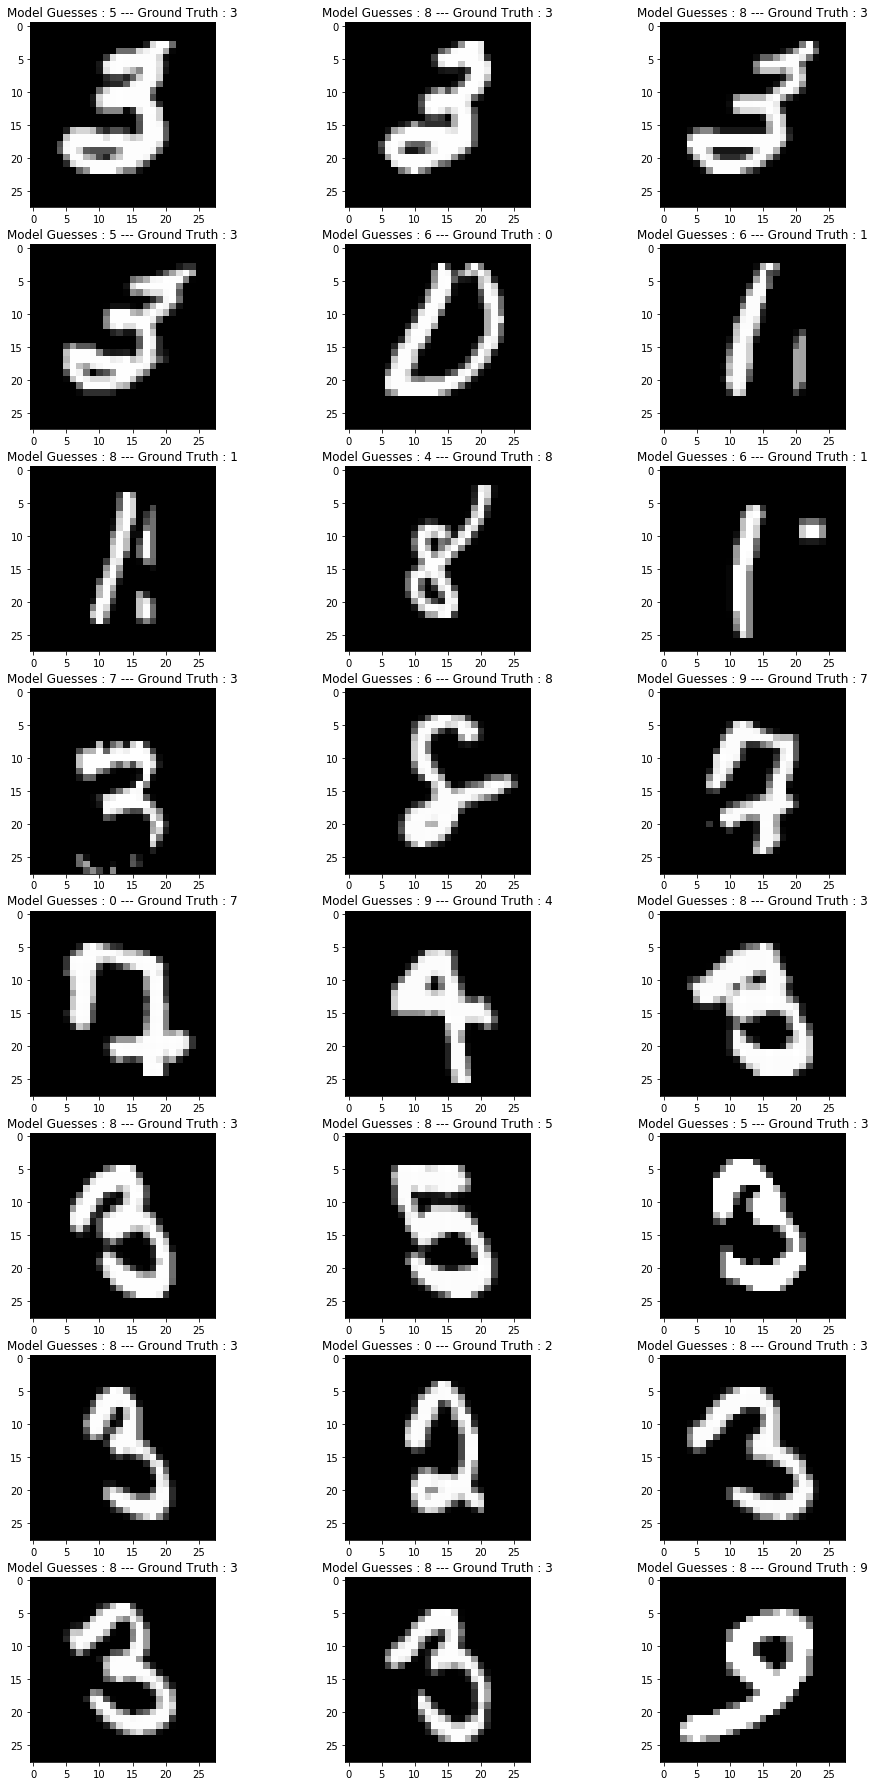

In [26]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(really_wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_2.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Badly Misclassified    
***

# <br><center>Examples Below Are Closer But Still Wrong
***

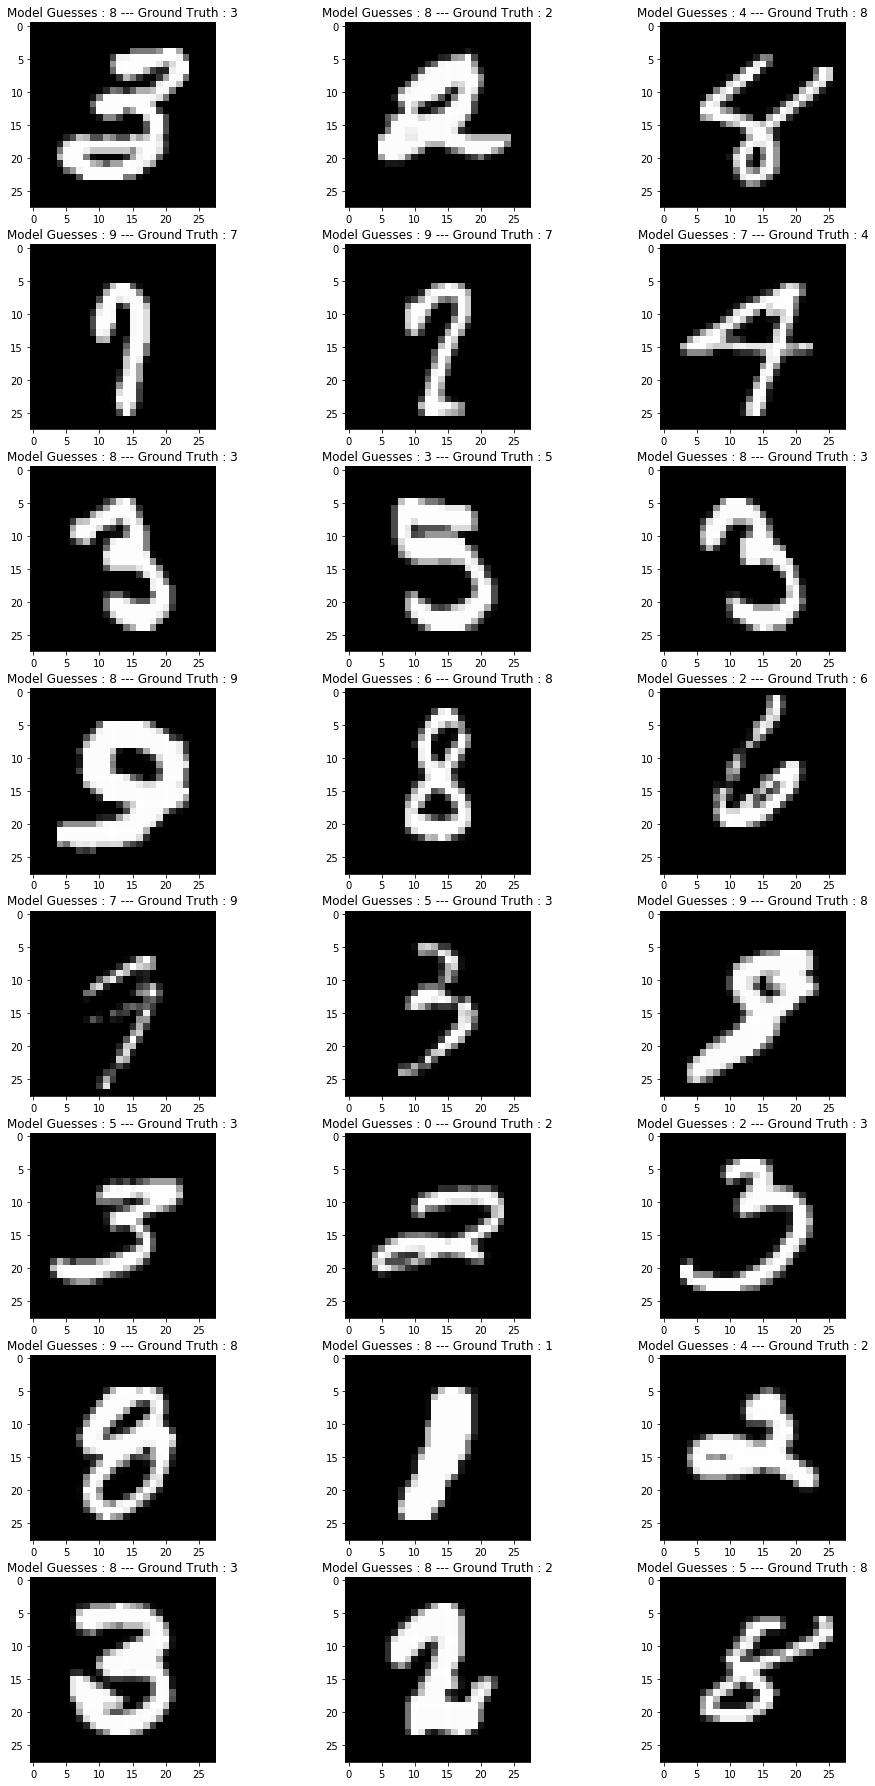

In [27]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_2.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
***
***
***

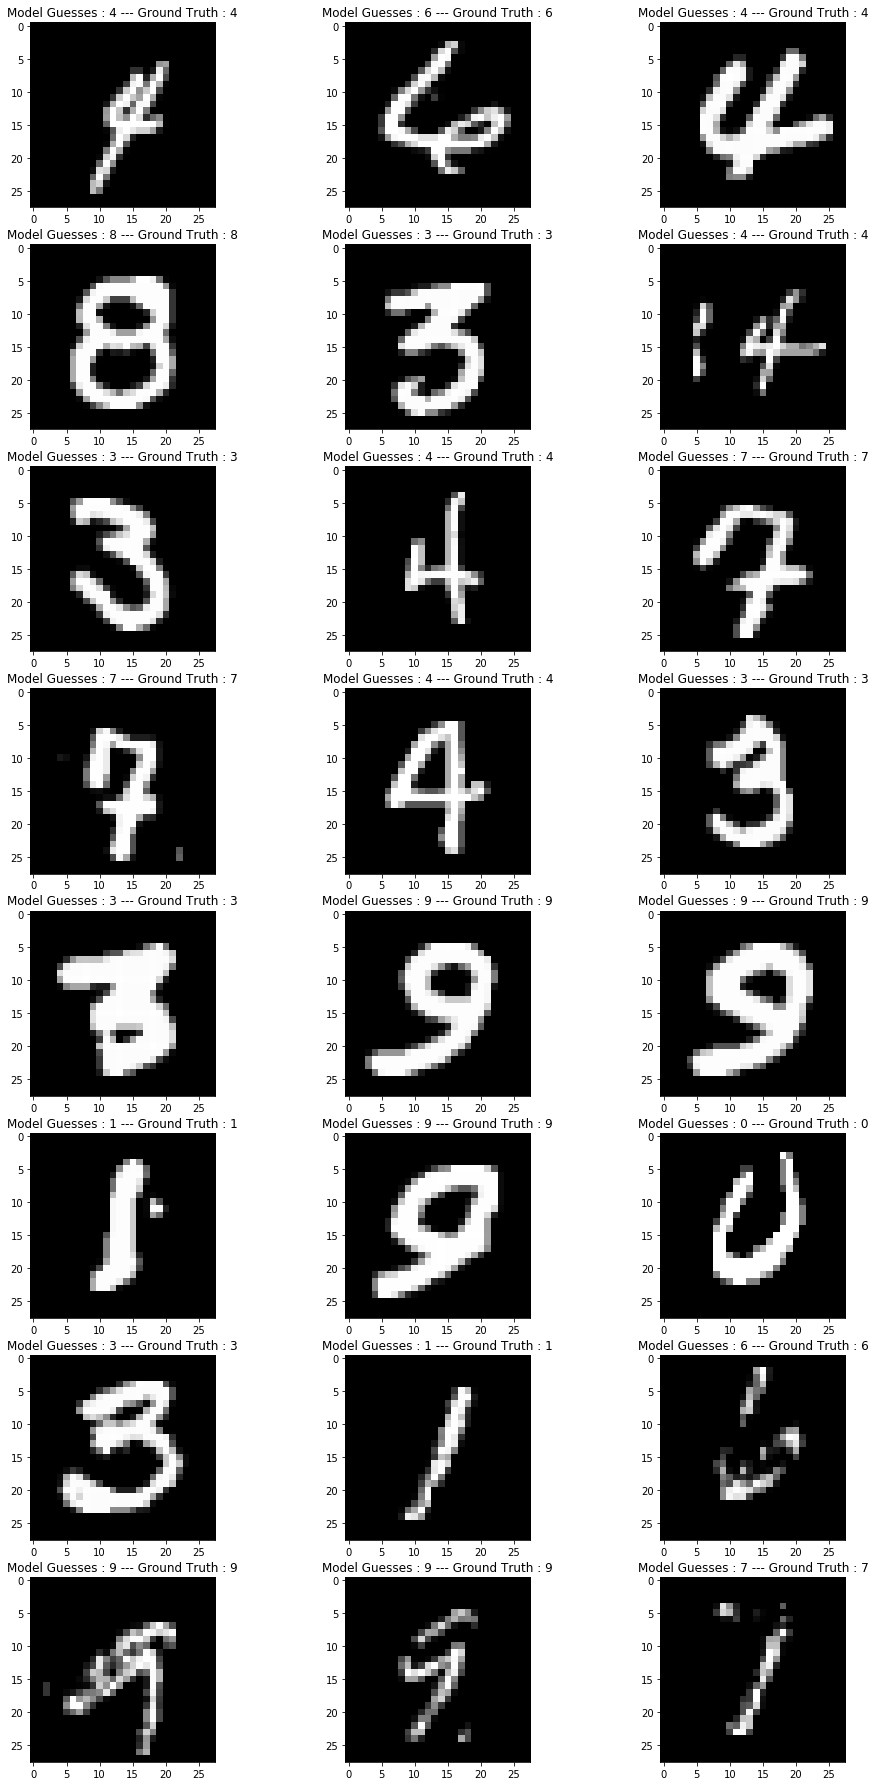

In [28]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16, 32))

for i, ex in enumerate(right_but_barely_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_2.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Close To Being Misclassified    
***

# <br><center>Examples Below Are Confidently Correctly Classified
***

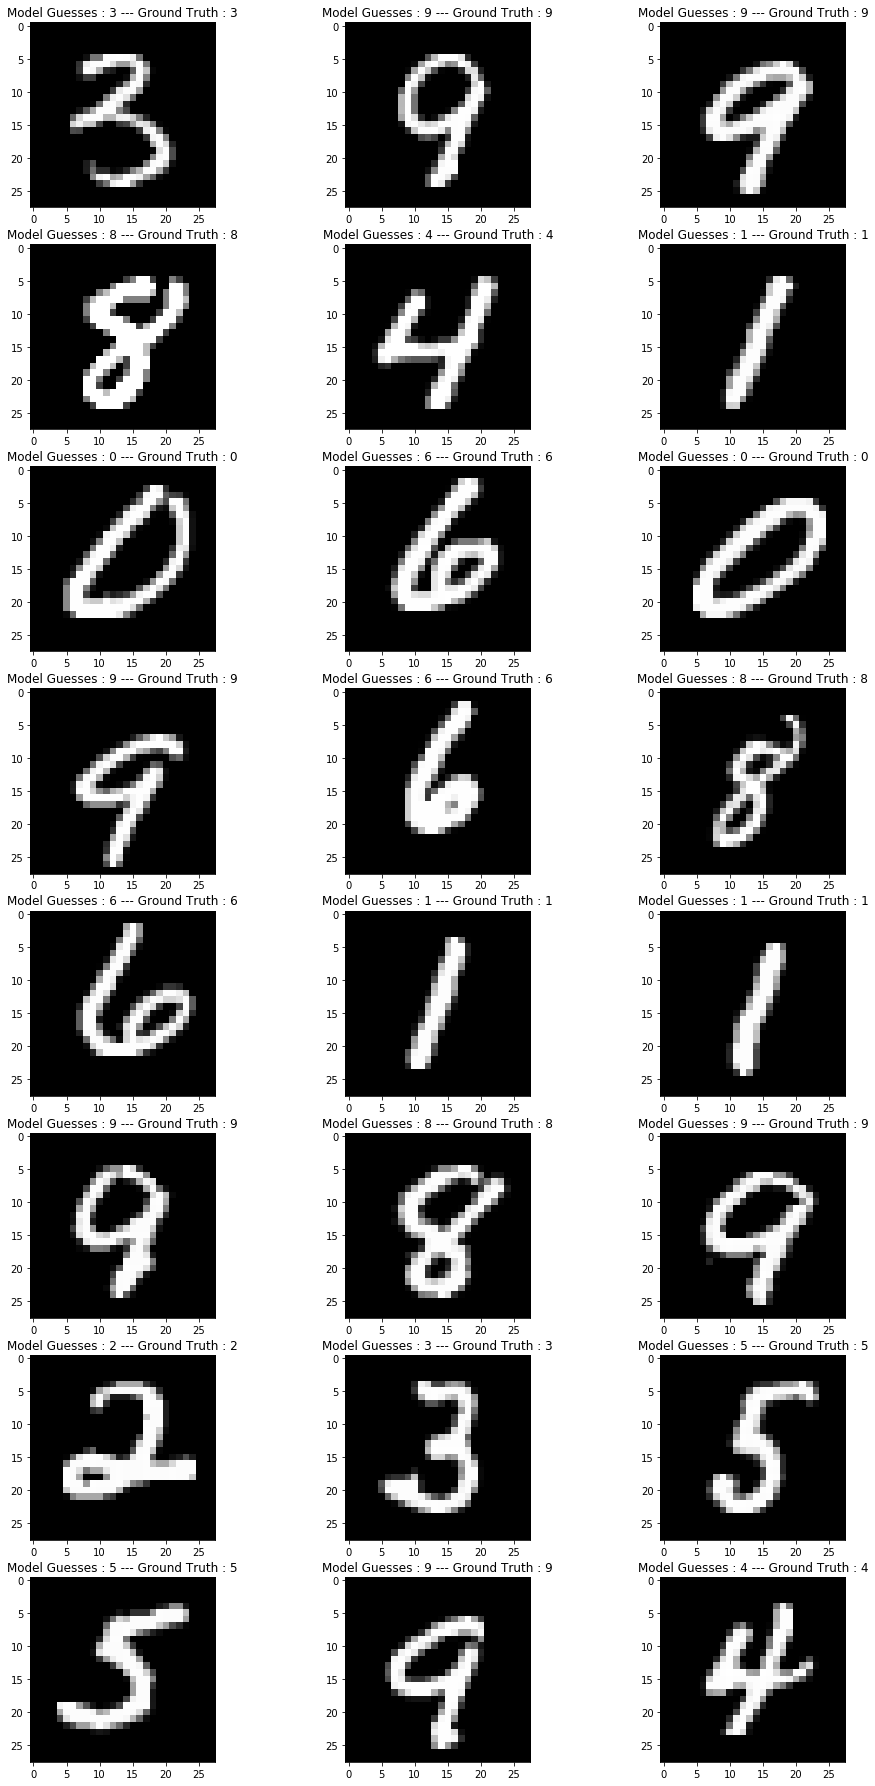

In [29]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(correct_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_2.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
## <center><br>Model 3 : Model 2 + ADAM (w/ Decay) + Dropout/Regularization
***

***
## <center><br>Step M3.1 : Define The Model Variable And Add The Layer(s)
***

In [30]:
# create a sequential model
model_3 = models.Sequential()

model_3.add(Dense(200, input_dim=784, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_3.add(Dropout(0.35))
model_3.add(Dense(60, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_3.add(Dropout(0.25))
model_3.add(Dense(30, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))
model_3.add(Dropout(0.1))
model_3.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


***
## <center><br>Step M3.2 : Pick Optimizer, Loss, and Other Metrics and Compile The Model
***

In [31]:
# For a multi-class classification problem

# Possible Optimizers
#
#   -  Adadelta    : Adadelta optimizer.
#   -  Adagrad     : Adagrad optimizer.
#   -  Adam        : Adam optimizer.
#   -  Adamax      : Adamax optimizer from Adam paper's Section 7.
#   -  Nadam       : Nesterov Adam optimizer.
#   -  Optimizer   : Abstract optimizer base class.
#   -  RMSprop     : RMSProp optimizer.
#   -  SGD         : Stochastic gradient descent optimizer.





# --------------------------------------------------------
#                  THIS LINE WILL CHANGE
# --------------------------------------------------------

model_3_opt = optimizers.Adam(decay=1e-4)

# --------------------------------------------------------





# Possible Losses
#
#   -  KLD(...)
#   -  MAE(...)
#   -  MAPE(...)
#   -  MSE(...)
#   -  MSLE(...)
#   -  binary_crossentropy(...)
#   -  categorical_crossentropy(...)
#   -  categorical_hinge(...)
#   -  cosine(...)
#   -  cosine_proximity(...)
#   -  deserialize(...)
#   -  get(...)
#   -  hinge(...)
#   -  kld(...)
#   -  kullback_leibler_divergence(...)
#   -  logcosh(...): Logarithm of the hyperbolic cosine of the prediction error.
#   -  mae(...)
#   -  mape(...)
#   -  mean_absolute_error(...)
#   -  mean_absolute_percentage_error(...)
#   -  mean_squared_error(...)
#   -  mean_squared_logarithmic_error(...)
#   -  mse(...)
#   -  msle(...)
#   -  poisson(...)
#   -  RMSprop(...)
#   -  serialize(...)
#   -  sparse_categorical_crossentropy(...)
#   -  squared_hinge(...)

model_3_loss = losses.categorical_crossentropy

# Possible Metrics
#
#   -  binary_accuracy
#   -  categorical_accuracy
#   -  sparse_categorical_accuracy
#   -  top_k_categorical_accuracy
#   -  sparse_top_k_categorical_accuracy
#   -  In addition to the metrics above, you may use any of the loss functions described in the loss function page as metrics
#   -  Custom metrics are also available

model_3_metrics = [metrics.categorical_accuracy]

# -------------------------------------------------------------------------------

model_3.compile(optimizer=model_3_opt,
                loss=model_3_loss,
                metrics=model_3_metrics)


# -------------------------------------------------------------------------------

In [32]:
print(model_3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1830      
__________

***
## <center><br>Step M3.3 : Fit The Model
***

In [33]:
# Number of Epochs Is A Bit Higher Due To Increased Complexity
history_3 = model_3.fit(x_train, 
                        y_train,
                        validation_data = (x_val, y_val),
                        batch_size=128,
                        epochs=40)

Train on 60000 samples, validate on 5000 samples
Epoch 1/40
60000/60000 [==============================] - 2s 40us/step - loss: 0.7337 - categorical_accuracy: 0.7533 - val_loss: 0.2878 - val_categorical_accuracy: 0.9188
Epoch 2/40
60000/60000 [==============================] - 2s 32us/step - loss: 0.3072 - categorical_accuracy: 0.9159 - val_loss: 0.2060 - val_categorical_accuracy: 0.9416
Epoch 3/40
60000/60000 [==============================] - 2s 32us/step - loss: 0.2393 - categorical_accuracy: 0.9354 - val_loss: 0.1785 - val_categorical_accuracy: 0.9502
Epoch 4/40
60000/60000 [==============================] - 2s 32us/step - loss: 0.2093 - categorical_accuracy: 0.9438 - val_loss: 0.1579 - val_categorical_accuracy: 0.9542
Epoch 5/40
60000/60000 [==============================] - 2s 32us/step - loss: 0.1848 - categorical_accuracy: 0.9498 - val_loss: 0.1488 - val_categorical_accuracy: 0.9592
Epoch 6/40
60000/60000 [==============================] - 2s 32us/step - loss: 0.1698 - categori

***
## <center><br>Step M3.4 : Plot Model Curves
***

Text(0.5,0,'Epoch #')

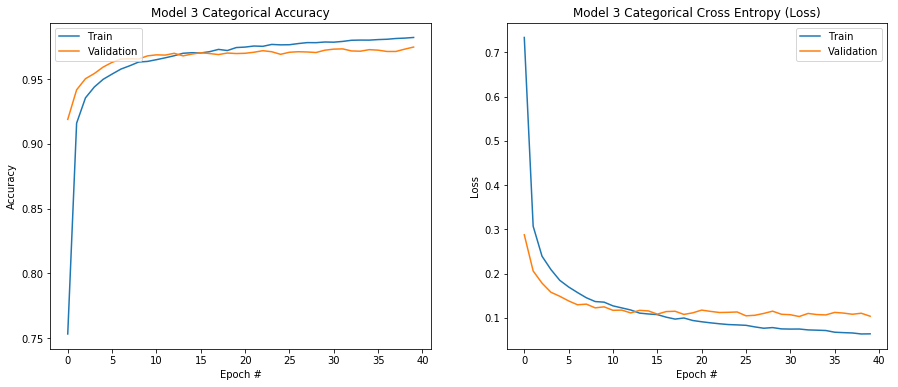

In [34]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(15,6))

# plt.subplot lets you plot multiple graphs...
# The arguments are plt.subplot(total_rows, total_columns, this_graph_number)
# So if you want 4 graphs two on the first line and two on the second then you'd call each plot as follows:
#
# UPPER  LEFT   PLOT = plt.subplot(2,2,1) 
# UPPER  RIGHT  PLOT = plt.subplot(2,2,2) 
# LOWER  LEFT   PLOT = plt.subplot(2,2,3) 
# LOWER  RIGHT  PLOT = plt.subplot(2,2,4) 

plt.subplot(1,2,1)
plt.plot(history_3.history['categorical_accuracy'])
plt.plot(history_3.history['val_categorical_accuracy'])
plt.title('Model 3 Categorical Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')

plt.subplot(1,2,2)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model 3 Categorical Cross Entropy (Loss)')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch #')

***
## <center><br>Step M3.5 : See How The Model Does On The Held Out Test Data
***

In [35]:
score = model_3.evaluate(x_test, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

5000/5000 [==============================] - 0s 11us/step

----------------------------------------------

Accuracy On Test Data is : 0.9872
Loss On Test Data is : 0.05491000279115978


***
## <center><br>Step M3.6 : See Misclassified Examples and Correctly Classified Examples
***

In [36]:
test_predictions = model_3.predict(x_test)
test_result = np.absolute(y_test-test_predictions)
test_result = [np.round(np.sum(result)) for result in test_result]

really_wrong_list = []
wrong_list = []
right_but_barely_list = []
correct_list = []

for i in range(len(test_result)):
        if (test_result[i] == 2.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            really_wrong_list.append(i)
        elif (test_result[i] == 1.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            wrong_list.append(i)
        elif (test_result[i] > 0) and (np.argmax(test_predictions[i]) == np.argmax(y_test[i])):
            right_but_barely_list.append(i)
        else:
            correct_list.append(i)

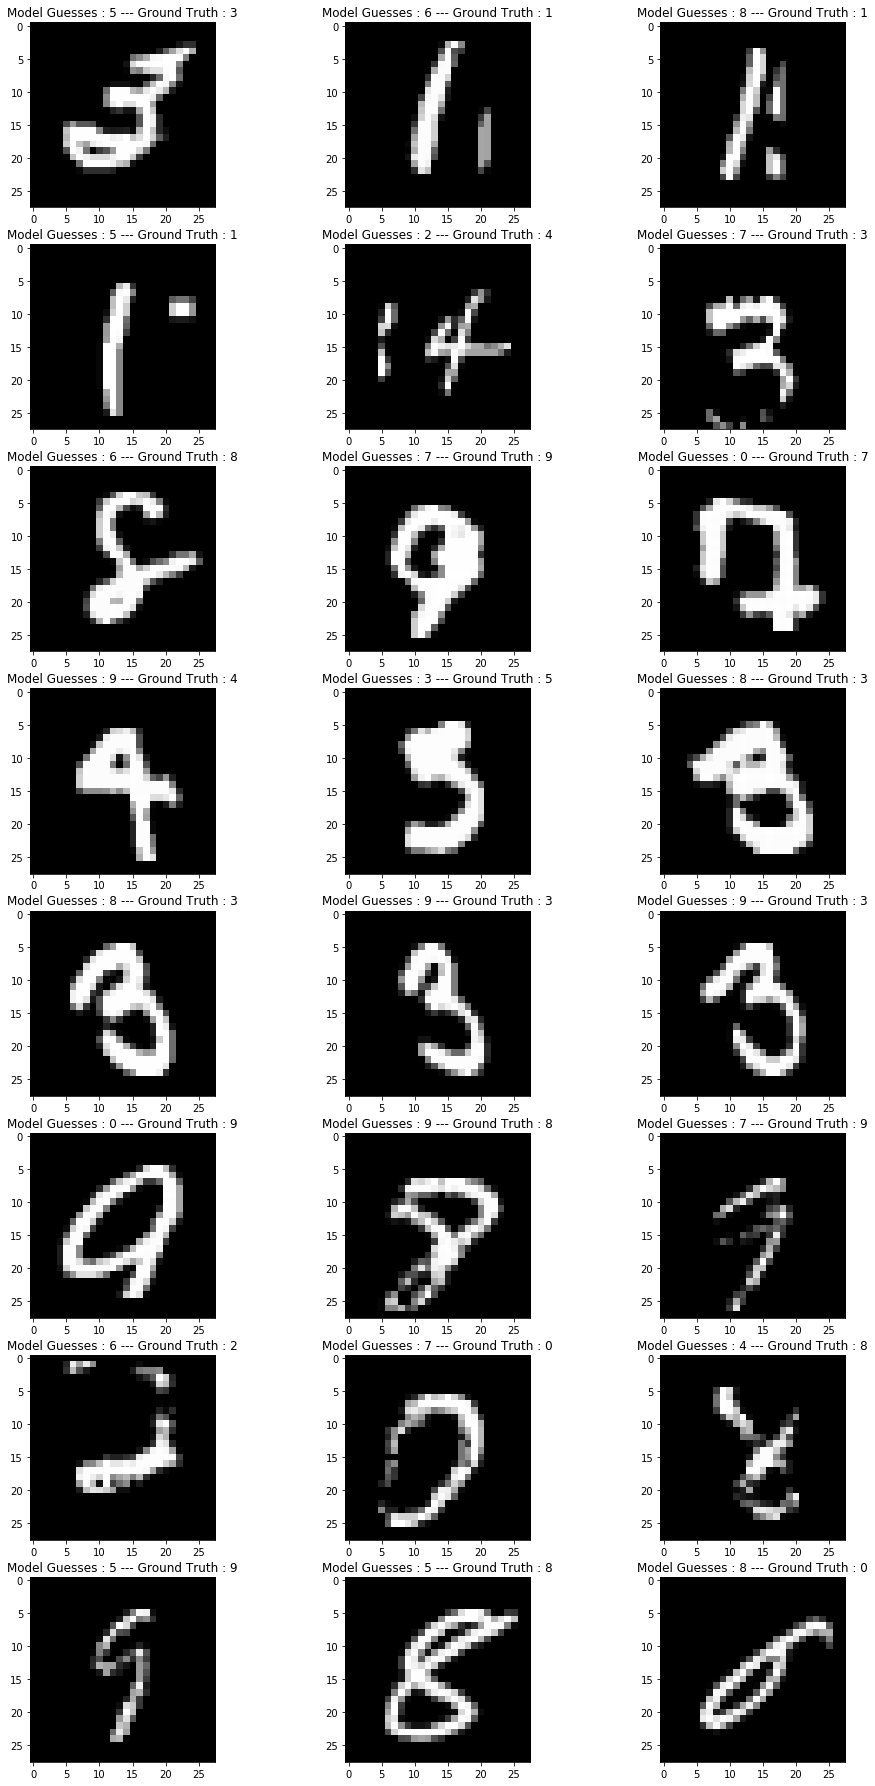

In [37]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(really_wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_3.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Badly Misclassified    
***

# <br><center>Examples Below Are Closer But Still Wrong
***

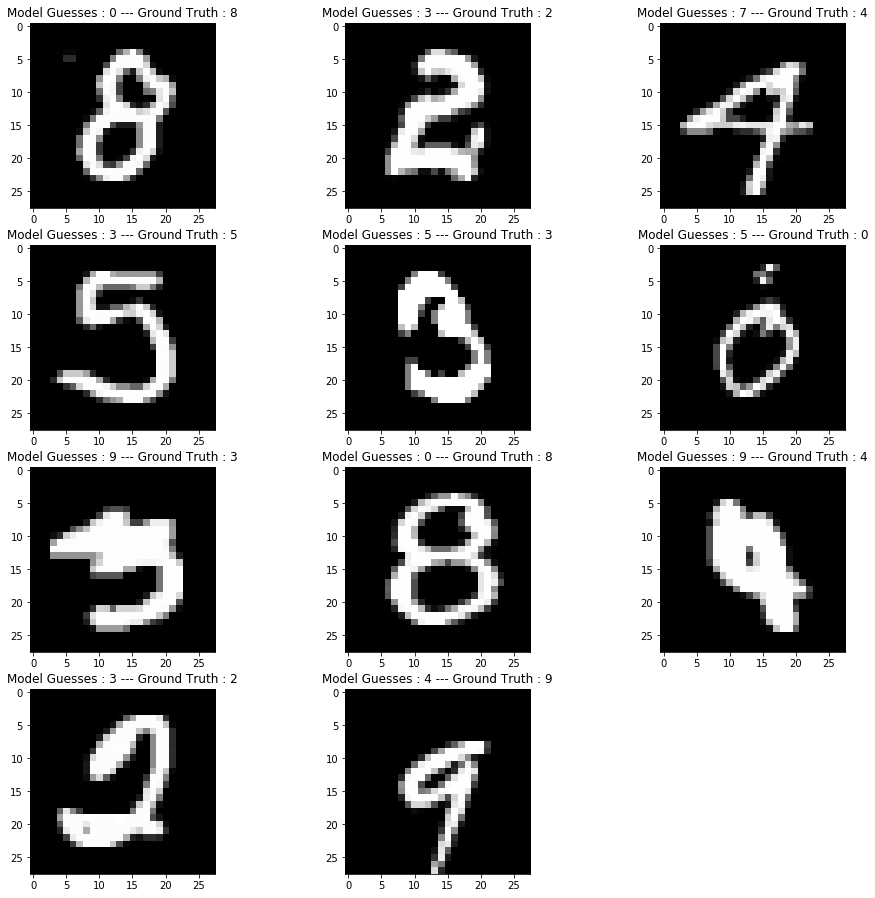

In [38]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_3.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
***
***
***

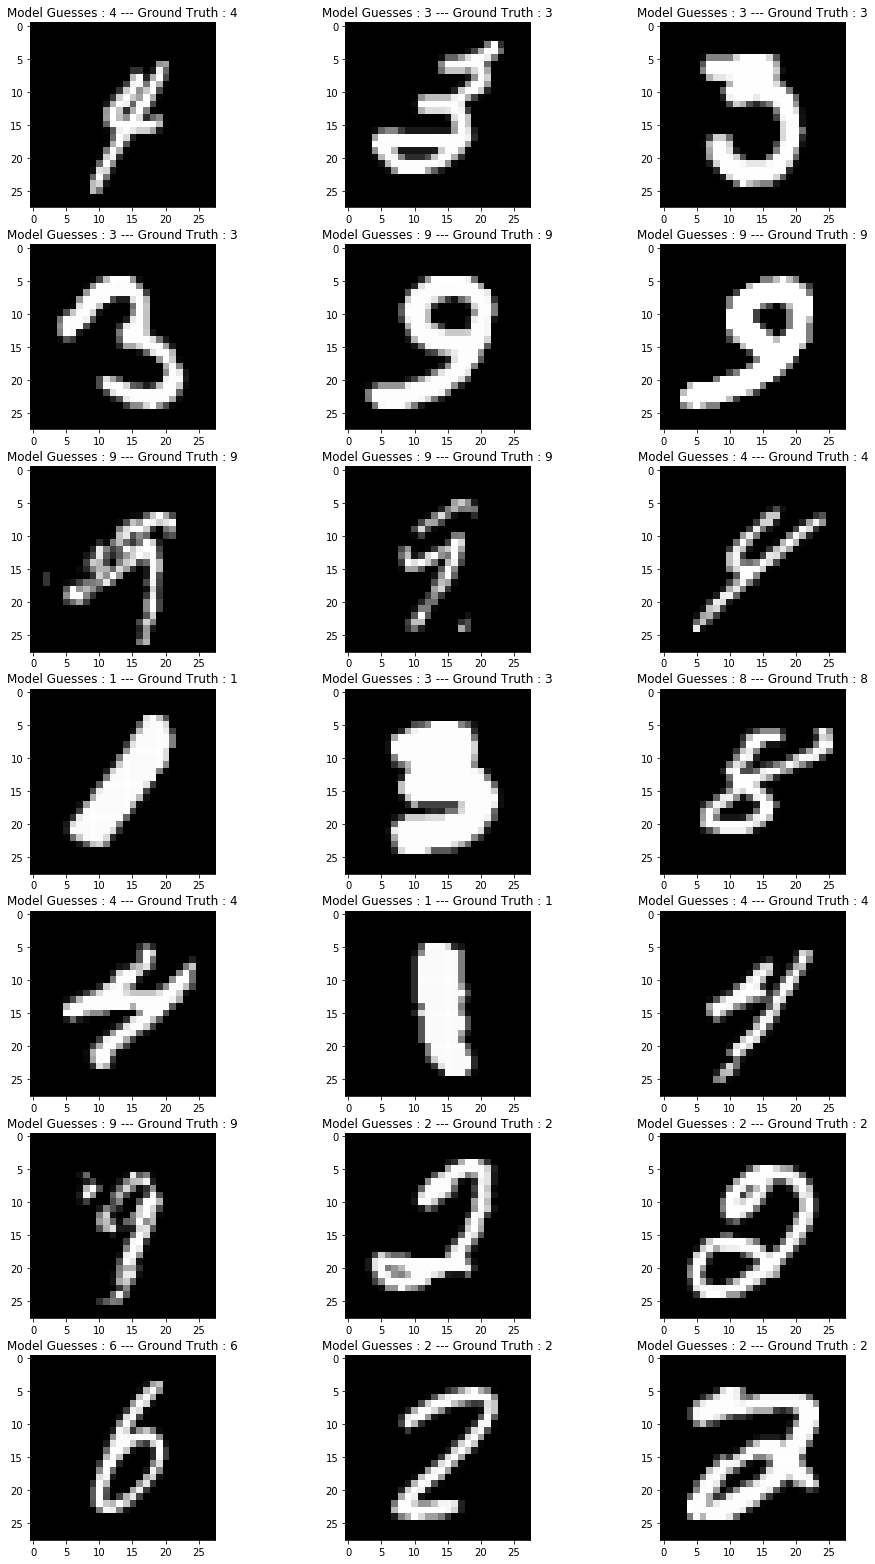

In [39]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16, 32))

for i, ex in enumerate(right_but_barely_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_3.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Close To Being Misclassified    
***

# <br><center>Examples Below Are Confidently Correctly Classified
***

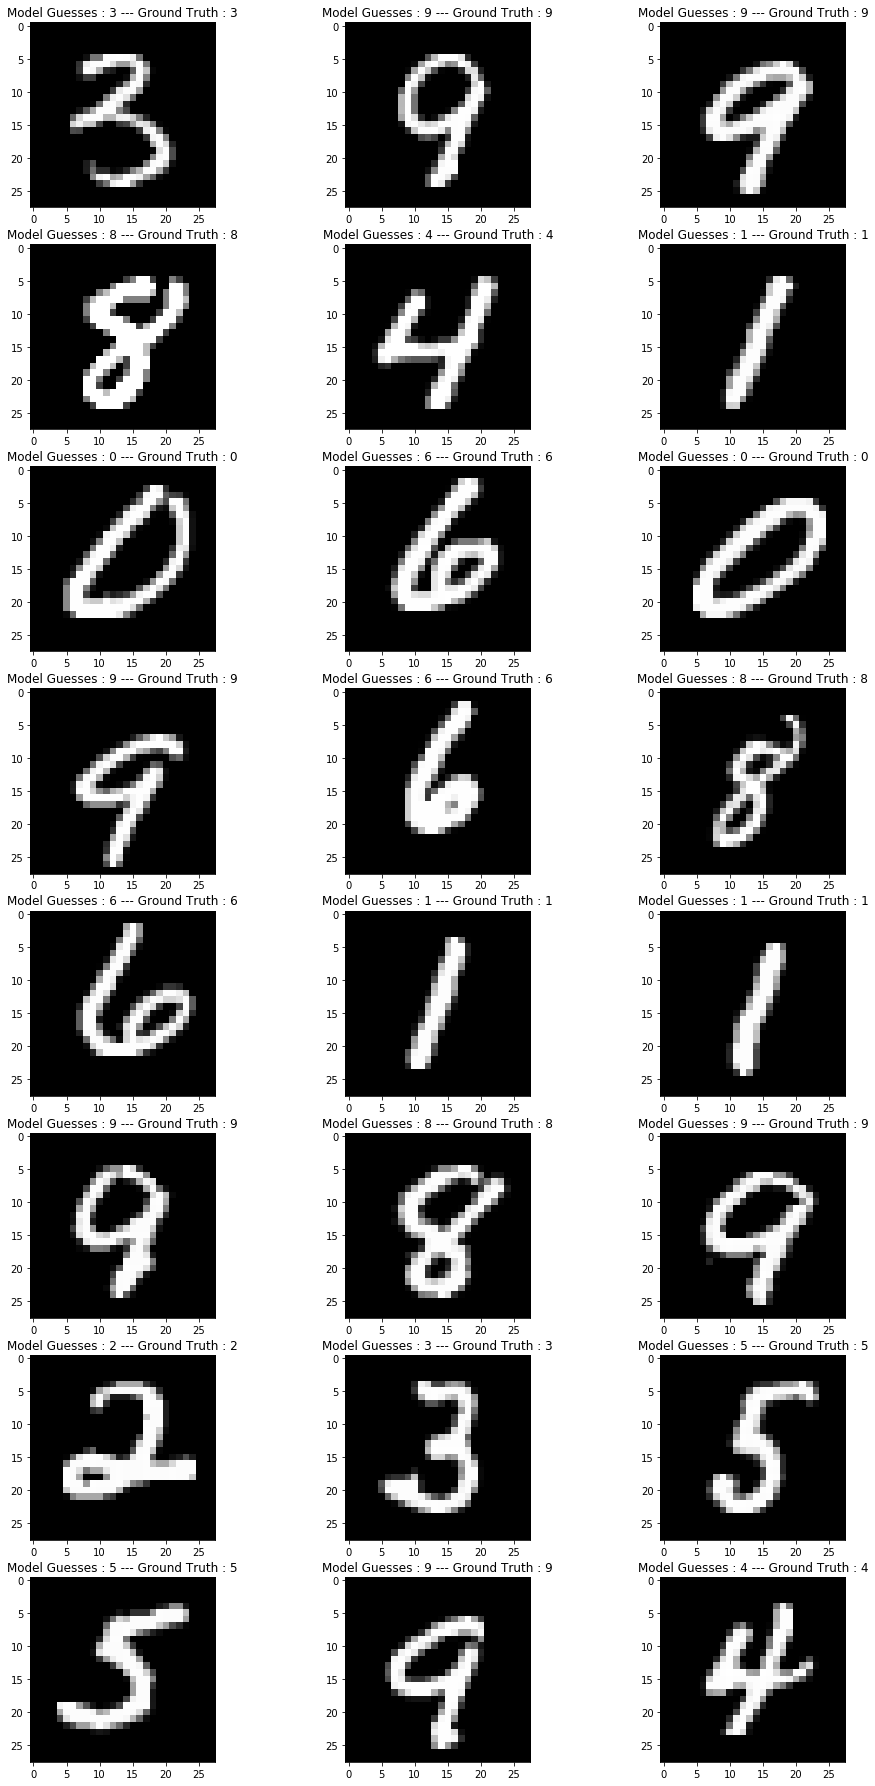

In [40]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(correct_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_3.predict(np.expand_dims(x_test[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test[ex],(28,28)), cmap="gray")

    if i>22:
        break

***

***
## <center><br>Model 4 : CNN (From Scratch)
***

***
## <center><br>Step M4.0 : Redefine Input Data To Be Shaped Like An Image (Instead of Unrolled)
***

In [41]:
print("Shape of training data before : {}".format(np.shape(x_train)))
x_train_cnn = [np.reshape(x,(28,28,1)) for x in x_train]
x_test_cnn = [np.reshape(x,(28,28,1)) for x in x_test]
x_val_cnn = [np.reshape(x,(28,28,1)) for x in x_val]
print("Shape of training data after : {}".format(np.shape(x_train_cnn)))

Shape of training data before : (60000, 784)
Shape of training data after : (60000, 28, 28, 1)


In [42]:
# This is necessary for some stupid reason
x_train_cnn = np.array(x_train_cnn).astype('float32')
x_test_cnn = np.array(x_test_cnn).astype('float32')
x_val_cnn = np.array(x_val_cnn).astype('float32')

***
## <center><br>Step M4.1 : Define The Model Variable And Add The Layer(s)
***

In [43]:
# create a sequential model
model_4 = models.Sequential()

model_4.add(Conv2D(filters=4, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same", 
                 input_shape=(28,28,1), 
                 kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_4.add(Conv2D(filters=8, kernel_size=(4, 4), strides=(2,2), activation='relu', padding="same", 
                 kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_4.add(Conv2D(filters=12, kernel_size=(4, 4), strides=(2,2), activation='relu', padding="same", 
                 kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_4.add(Flatten())
model_4.add(Dense(200, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_4.add(Dense(10, activation='softmax'))

***
## <center><br>Step M4.2 : Pick Optimizer, Loss, and Other Metrics and Compile The Model
***

In [44]:
# For a multi-class classification problem

# Possible Optimizers
#
#   -  Adadelta    : Adadelta optimizer.
#   -  Adagrad     : Adagrad optimizer.
#   -  Adam        : Adam optimizer.
#   -  Adamax      : Adamax optimizer from Adam paper's Section 7.
#   -  Nadam       : Nesterov Adam optimizer.
#   -  Optimizer   : Abstract optimizer base class.
#   -  RMSprop     : RMSProp optimizer.
#   -  SGD         : Stochastic gradient descent optimizer.

model_4_opt = optimizers.Adam(decay=1e-4)

# Possible Losses
#
#   -  KLD(...)
#   -  MAE(...)
#   -  MAPE(...)
#   -  MSE(...)
#   -  MSLE(...)
#   -  binary_crossentropy(...)
#   -  categorical_crossentropy(...)
#   -  categorical_hinge(...)
#   -  cosine(...)
#   -  cosine_proximity(...)
#   -  deserialize(...)
#   -  get(...)
#   -  hinge(...)
#   -  kld(...)
#   -  kullback_leibler_divergence(...)
#   -  logcosh(...): Logarithm of the hyperbolic cosine of the prediction error.
#   -  mae(...)
#   -  mape(...)
#   -  mean_absolute_error(...)
#   -  mean_absolute_percentage_error(...)
#   -  mean_squared_error(...)
#   -  mean_squared_logarithmic_error(...)
#   -  mse(...)
#   -  msle(...)
#   -  poisson(...)
#   -  RMSprop(...)
#   -  serialize(...)
#   -  sparse_categorical_crossentropy(...)
#   -  squared_hinge(...)

model_4_loss = losses.categorical_crossentropy

# Possible Metrics
#
#   -  binary_accuracy
#   -  categorical_accuracy
#   -  sparse_categorical_accuracy
#   -  top_k_categorical_accuracy
#   -  sparse_top_k_categorical_accuracy
#   -  In addition to the metrics above, you may use any of the loss functions described in the loss function page as metrics
#   -  Custom metrics are also available

model_4_metrics = [metrics.categorical_accuracy]

# -------------------------------------------------------------------------------

model_4.compile(optimizer=model_4_opt,
                loss=model_4_loss,
                metrics=model_4_metrics)


# -------------------------------------------------------------------------------

In [45]:
print(model_4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         520       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 12)          1548      
_________________________________________________________________
flatten_1 (Flatten)          (None, 588)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               117800    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2010      
Total params: 121,982
Trainable params: 121,982
Non-trainable params: 0
_________________________________________________________________
None

***
## <center><br>Step M4.3 : Fit The Model
***

In [46]:
# Number of Epochs Is A Bit Higher Due To Increased Complexity
history_4 = model_4.fit(x_train_cnn, 
                        y_train,
                        validation_data = (x_val_cnn, y_val),
                        batch_size=128,
                        epochs=40)

Train on 60000 samples, validate on 5000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 70us/step - loss: 0.4195 - categorical_accuracy: 0.8755 - val_loss: 0.1741 - val_categorical_accuracy: 0.9468
Epoch 2/40
60000/60000 [==============================] - 2s 33us/step - loss: 0.1140 - categorical_accuracy: 0.9658 - val_loss: 0.0914 - val_categorical_accuracy: 0.9712
Epoch 3/40
60000/60000 [==============================] - 2s 33us/step - loss: 0.0706 - categorical_accuracy: 0.9784 - val_loss: 0.0748 - val_categorical_accuracy: 0.9758
Epoch 4/40
60000/60000 [==============================] - 2s 33us/step - loss: 0.0541 - categorical_accuracy: 0.9832 - val_loss: 0.0777 - val_categorical_accuracy: 0.9734
Epoch 5/40
60000/60000 [==============================] - 2s 33us/step - loss: 0.0434 - categorical_accuracy: 0.9863 - val_loss: 0.0691 - val_categorical_accuracy: 0.9778
Epoch 6/40
60000/60000 [==============================] - 2s 34us/step - loss: 0.0371 - categori

***
## <center><br>Step M4.4 : Plot Model Curves
***

Text(0.5,0,'Epoch #')

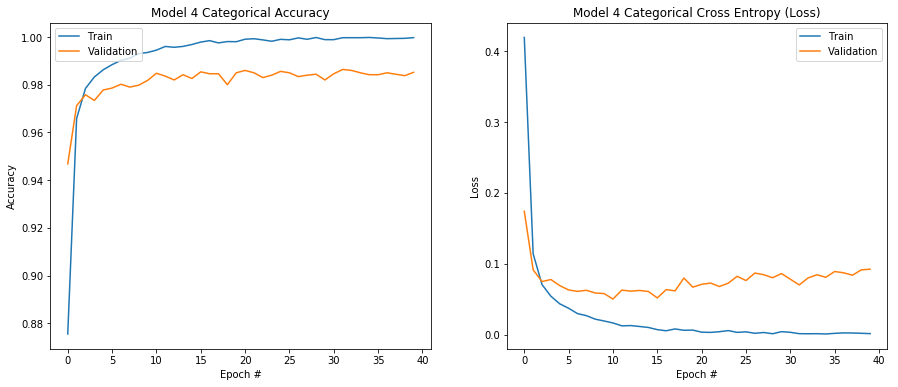

In [47]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(15,6))

# plt.subplot lets you plot multiple graphs...
# The arguments are plt.subplot(total_rows, total_columns, this_graph_number)
# So if you want 4 graphs two on the first line and two on the second then you'd call each plot as follows:
#
# UPPER  LEFT   PLOT = plt.subplot(2,2,1) 
# UPPER  RIGHT  PLOT = plt.subplot(2,2,2) 
# LOWER  LEFT   PLOT = plt.subplot(2,2,3) 
# LOWER  RIGHT  PLOT = plt.subplot(2,2,4) 

plt.subplot(1,2,1)
plt.plot(history_4.history['categorical_accuracy'])
plt.plot(history_4.history['val_categorical_accuracy'])
plt.title('Model 4 Categorical Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')

plt.subplot(1,2,2)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model 4 Categorical Cross Entropy (Loss)')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch #')

***
## <center><br>Step M4.5 : See How The Model Does On The Held Out Test Data
***

In [48]:
score = model_4.evaluate(x_test_cnn, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

5000/5000 [==============================] - 0s 13us/step

----------------------------------------------

Accuracy On Test Data is : 0.993
Loss On Test Data is : 0.03518336244605455


***
## <center><br>Step M4.6 : See Misclassified Examples and Correctly Classified Examples
***

In [49]:
test_predictions = model_4.predict(x_test_cnn)
test_result = np.absolute(y_test-test_predictions)
test_result = [np.round(np.sum(result)) for result in test_result]

really_wrong_list = []
wrong_list = []
right_but_barely_list = []
correct_list = []

for i in range(len(test_result)):
        if (test_result[i] == 2.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            really_wrong_list.append(i)
        elif (test_result[i] == 1.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            wrong_list.append(i)
        elif (test_result[i] > 0) and (np.argmax(test_predictions[i]) == np.argmax(y_test[i])):
            right_but_barely_list.append(i)
        else:
            correct_list.append(i)

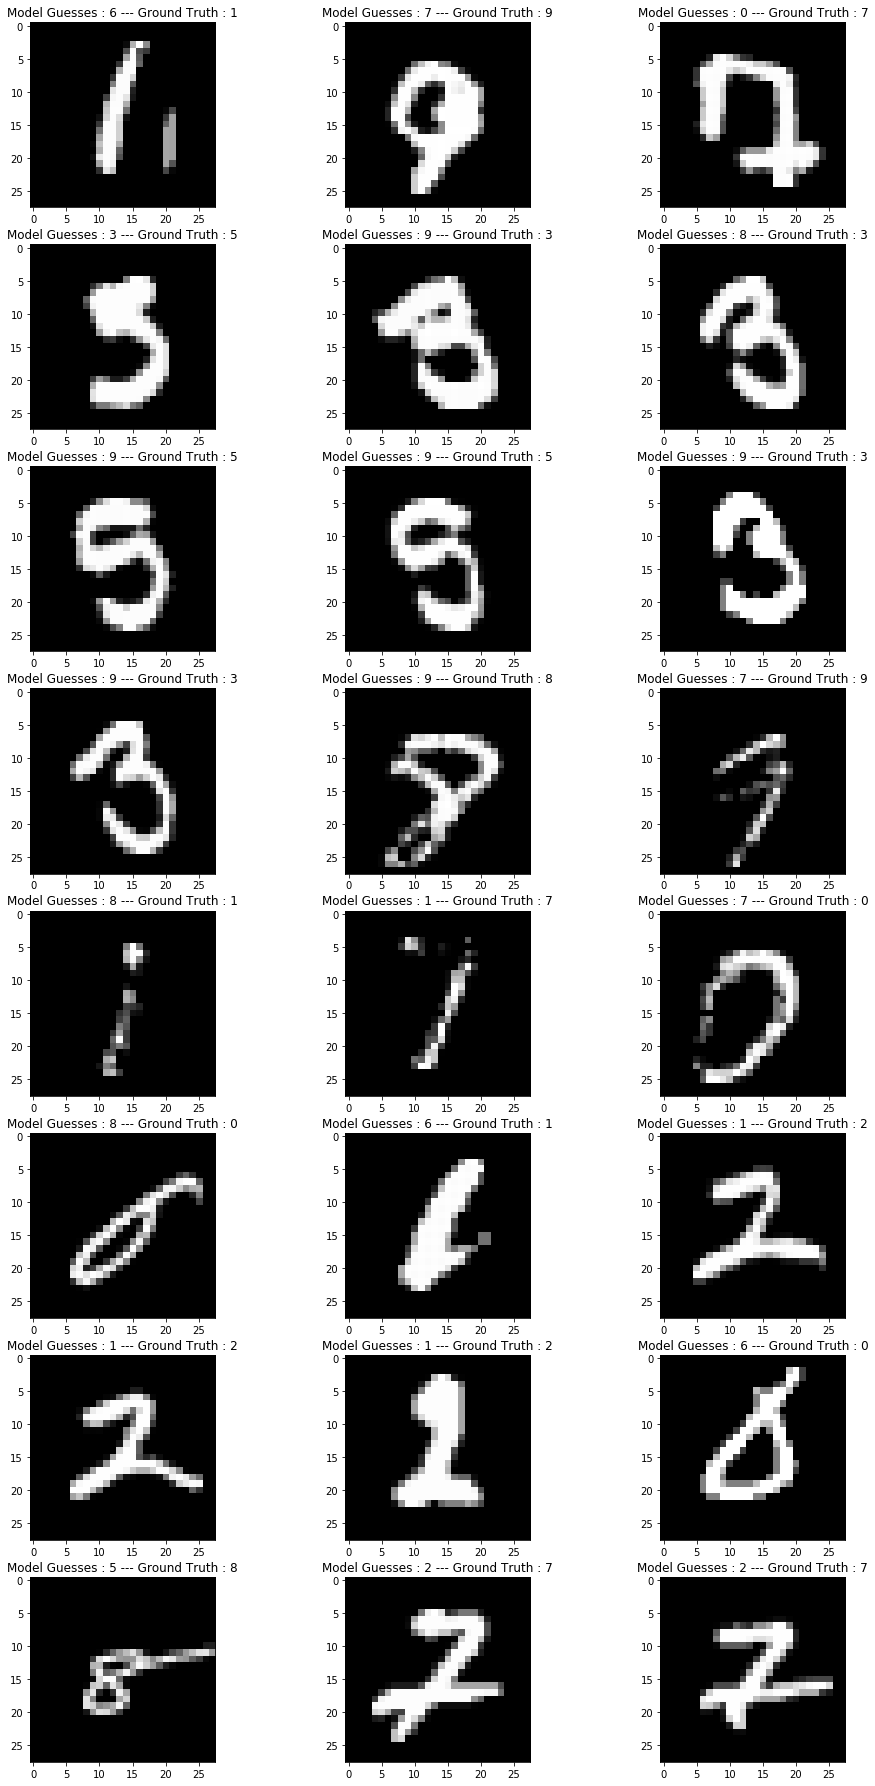

In [50]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(really_wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_4.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Badly Misclassified    
***

# <br><center>Examples Below Are Closer But Still Wrong
***

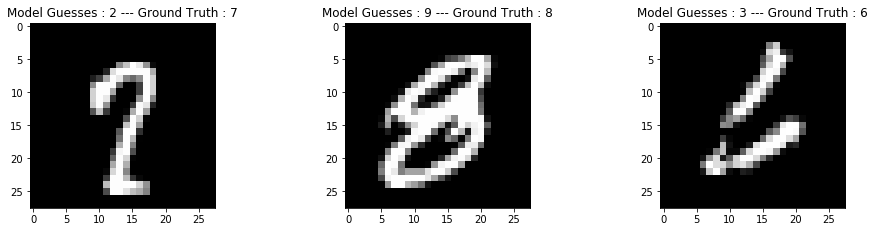

In [51]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_4.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
***
***
***

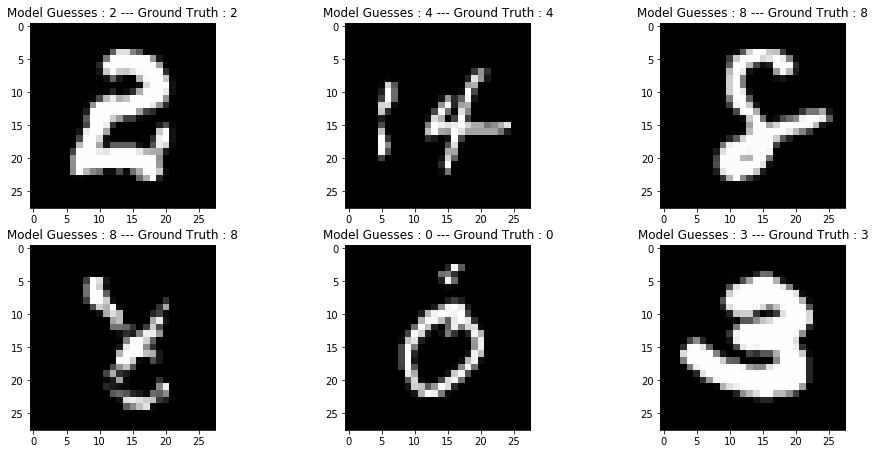

In [52]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16, 32))

for i, ex in enumerate(right_but_barely_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_4.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Close To Being Misclassified    
***

# <br><center>Examples Below Are Confidently Correctly Classified
***

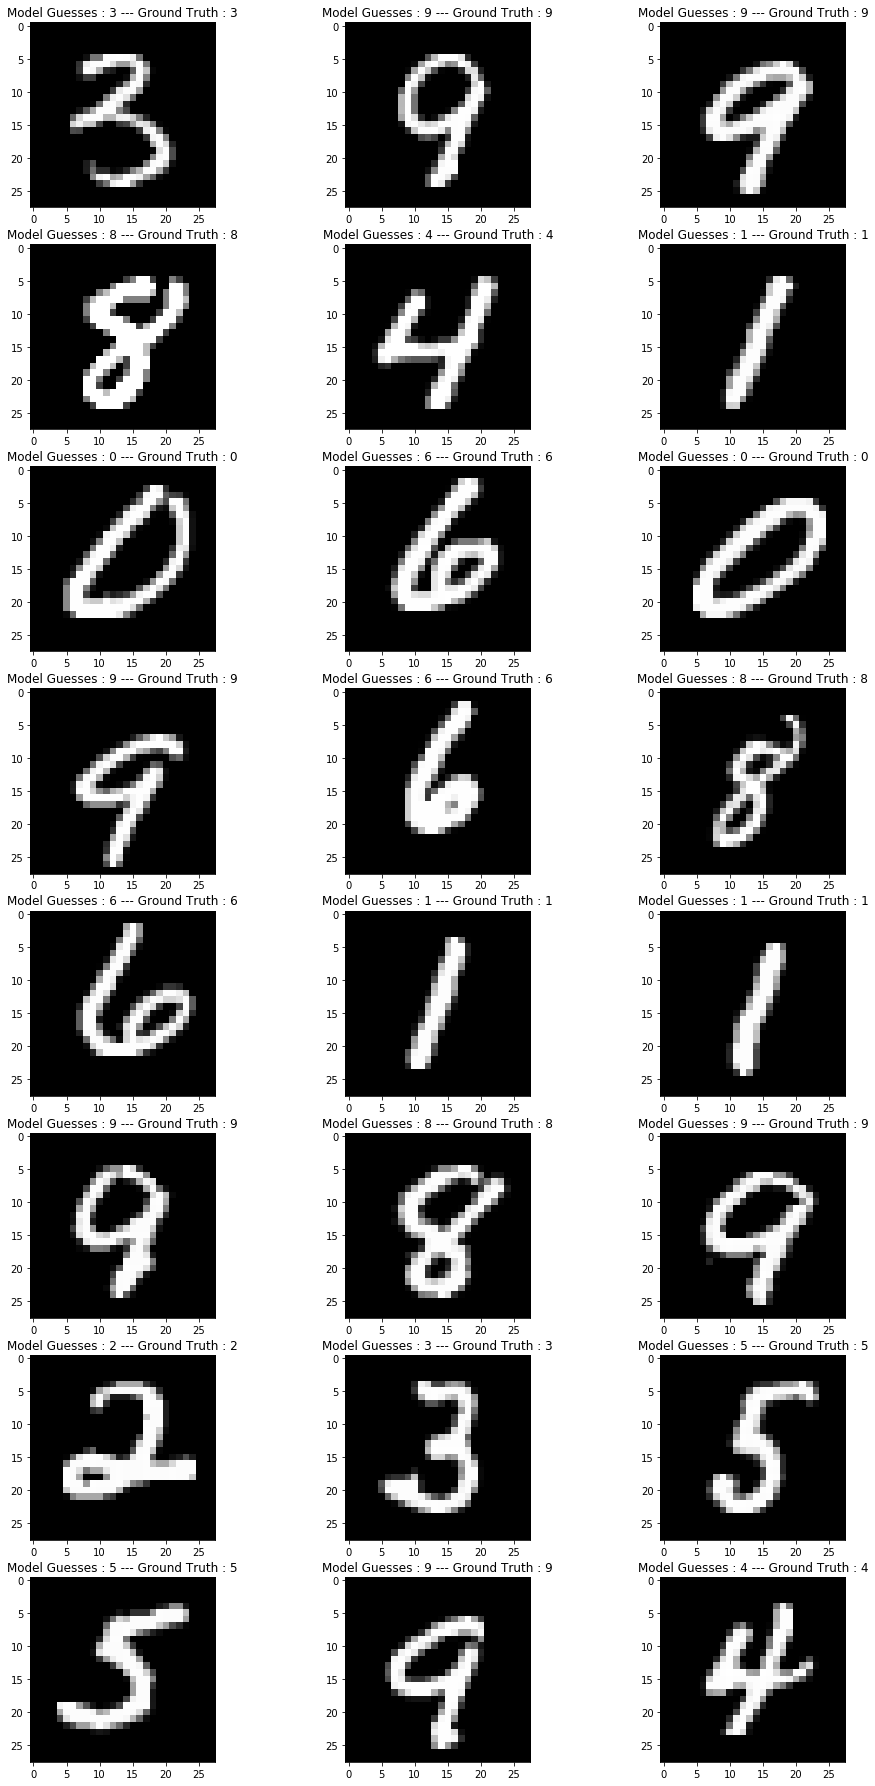

In [53]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(correct_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_4.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

***

***
## <center><br>Model 5 : Bigger CNN And Add Dropout/Regularization
***

***
## <center><br>Step M5.1 : Define The Model Variable And Add The Layer(s)
***

In [54]:
# create a sequential model
model_5 = models.Sequential()

model_5.add(Conv2D(filters=16, kernel_size=(4, 4), strides=1, activation='relu', padding="valid", 
                 input_shape=(28,28,1), 
                 kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_5.add(Conv2D(filters=32, kernel_size=(5, 5), strides=1, activation='relu', padding="valid", 
                 kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_5.add(Conv2D(filters=64, kernel_size=(6, 6), strides=1, activation='relu', padding="valid", 
                 kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_5.add(Dropout(0.2))

model_5.add(Flatten())
model_5.add(Dense(200, activation='relu', kernel_initializer='truncated_normal', bias_initializer='zeros'))

model_5.add(Dropout(0.4))

model_5.add(Dense(10, activation='softmax'))

***
## <center><br>Step M3.2 : Pick Optimizer, Loss, and Other Metrics and Compile The Model
***

In [55]:
# For a multi-class classification problem

# Possible Optimizers
#
#   -  Adadelta    : Adadelta optimizer.
#   -  Adagrad     : Adagrad optimizer.
#   -  Adam        : Adam optimizer.
#   -  Adamax      : Adamax optimizer from Adam paper's Section 7.
#   -  Nadam       : Nesterov Adam optimizer.
#   -  Optimizer   : Abstract optimizer base class.
#   -  RMSprop     : RMSProp optimizer.
#   -  SGD         : Stochastic gradient descent optimizer.

model_5_opt = optimizers.Adam(decay=1e-4)

# Possible Losses
#
#   -  KLD(...)
#   -  MAE(...)
#   -  MAPE(...)
#   -  MSE(...)
#   -  MSLE(...)
#   -  binary_crossentropy(...)
#   -  categorical_crossentropy(...)
#   -  categorical_hinge(...)
#   -  cosine(...)
#   -  cosine_proximity(...)
#   -  deserialize(...)
#   -  get(...)
#   -  hinge(...)
#   -  kld(...)
#   -  kullback_leibler_divergence(...)
#   -  logcosh(...): Logarithm of the hyperbolic cosine of the prediction error.
#   -  mae(...)
#   -  mape(...)
#   -  mean_absolute_error(...)
#   -  mean_absolute_percentage_error(...)
#   -  mean_squared_error(...)
#   -  mean_squared_logarithmic_error(...)
#   -  mse(...)
#   -  msle(...)
#   -  poisson(...)
#   -  RMSprop(...)
#   -  serialize(...)
#   -  sparse_categorical_crossentropy(...)
#   -  squared_hinge(...)

model_5_loss = losses.categorical_crossentropy

# Possible Metrics
#
#   -  binary_accuracy
#   -  categorical_accuracy
#   -  sparse_categorical_accuracy
#   -  top_k_categorical_accuracy
#   -  sparse_top_k_categorical_accuracy
#   -  In addition to the metrics above, you may use any of the loss functions described in the loss function page as metrics
#   -  Custom metrics are also available

model_5_metrics = [metrics.categorical_accuracy]

# -------------------------------------------------------------------------------

model_5.compile(optimizer=model_5_opt,
                loss=model_5_loss,
                metrics=model_5_metrics)


# -------------------------------------------------------------------------------

In [56]:
print(model_5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 16)        272       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 32)        12832     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               3277000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
__________

***
## <center><br>Step M5.3 : Fit The Model
***

In [57]:
# Number of Epochs Is A Bit Higher Due To Increased Complexity
history_5 = model_5.fit(x_train_cnn, 
                        y_train,
                        validation_data = (x_val_cnn, y_val),
                        batch_size=128,
                        epochs=40)

Train on 60000 samples, validate on 5000 samples
Epoch 1/40
60000/60000 [==============================] - 4s 66us/step - loss: 0.1522 - categorical_accuracy: 0.9536 - val_loss: 0.0561 - val_categorical_accuracy: 0.9812
Epoch 2/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.0489 - categorical_accuracy: 0.9849 - val_loss: 0.0424 - val_categorical_accuracy: 0.9854
Epoch 3/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.0364 - categorical_accuracy: 0.9892 - val_loss: 0.0409 - val_categorical_accuracy: 0.9878
Epoch 4/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.0256 - categorical_accuracy: 0.9923 - val_loss: 0.0296 - val_categorical_accuracy: 0.9906
Epoch 5/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.0187 - categorical_accuracy: 0.9942 - val_loss: 0.0341 - val_categorical_accuracy: 0.9900
Epoch 6/40
60000/60000 [==============================] - 3s 52us/step - loss: 0.0162 - categori

***
## <center><br>Step M5.4 : Plot Model Curves
***

Text(0.5,0,'Epoch #')

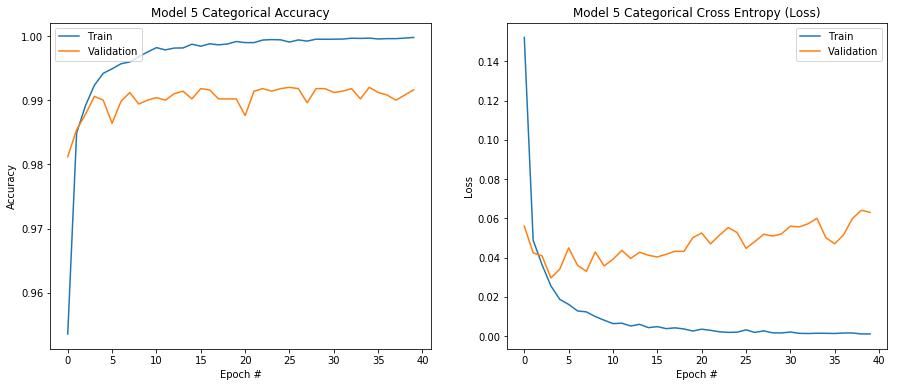

In [58]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(15,6))

# plt.subplot lets you plot multiple graphs...
# The arguments are plt.subplot(total_rows, total_columns, this_graph_number)
# So if you want 4 graphs two on the first line and two on the second then you'd call each plot as follows:
#
# UPPER  LEFT   PLOT = plt.subplot(2,2,1) 
# UPPER  RIGHT  PLOT = plt.subplot(2,2,2) 
# LOWER  LEFT   PLOT = plt.subplot(2,2,3) 
# LOWER  RIGHT  PLOT = plt.subplot(2,2,4) 

plt.subplot(1,2,1)
plt.plot(history_5.history['categorical_accuracy'])
plt.plot(history_5.history['val_categorical_accuracy'])
plt.title('Model 5 Categorical Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')

plt.subplot(1,2,2)
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model 5 Categorical Cross Entropy (Loss)')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch #')

***
## <center><br>Step M5.5 : See How The Model Does On The Held Out Test Data
***

In [59]:
score = model_5.evaluate(x_test_cnn, y_test, batch_size=128)
print("\n----------------------------------------------\n\nAccuracy On Test Data is : {}".format(score[1]))
print("Loss On Test Data is : {}".format(score[0]))

5000/5000 [==============================] - 0s 18us/step

----------------------------------------------

Accuracy On Test Data is : 0.9974
Loss On Test Data is : 0.015840130501569752


***
## <center><br>Step M5.6 : See Misclassified Examples and Correctly Classified Examples
***

In [60]:
test_predictions = model_5.predict(x_test_cnn)
test_result = np.absolute(y_test-test_predictions)
test_result = [np.round(np.sum(result)) for result in test_result]

really_wrong_list = []
wrong_list = []
right_but_barely_list = []
correct_list = []

for i in range(len(test_result)):
        if (test_result[i] == 2.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            really_wrong_list.append(i)
        elif (test_result[i] == 1.0) and (np.argmax(test_predictions[i]) != np.argmax(y_test[i])):
            wrong_list.append(i)
        elif (test_result[i] > 0) and (np.argmax(test_predictions[i]) == np.argmax(y_test[i])):
            right_but_barely_list.append(i)
        else:
            correct_list.append(i)

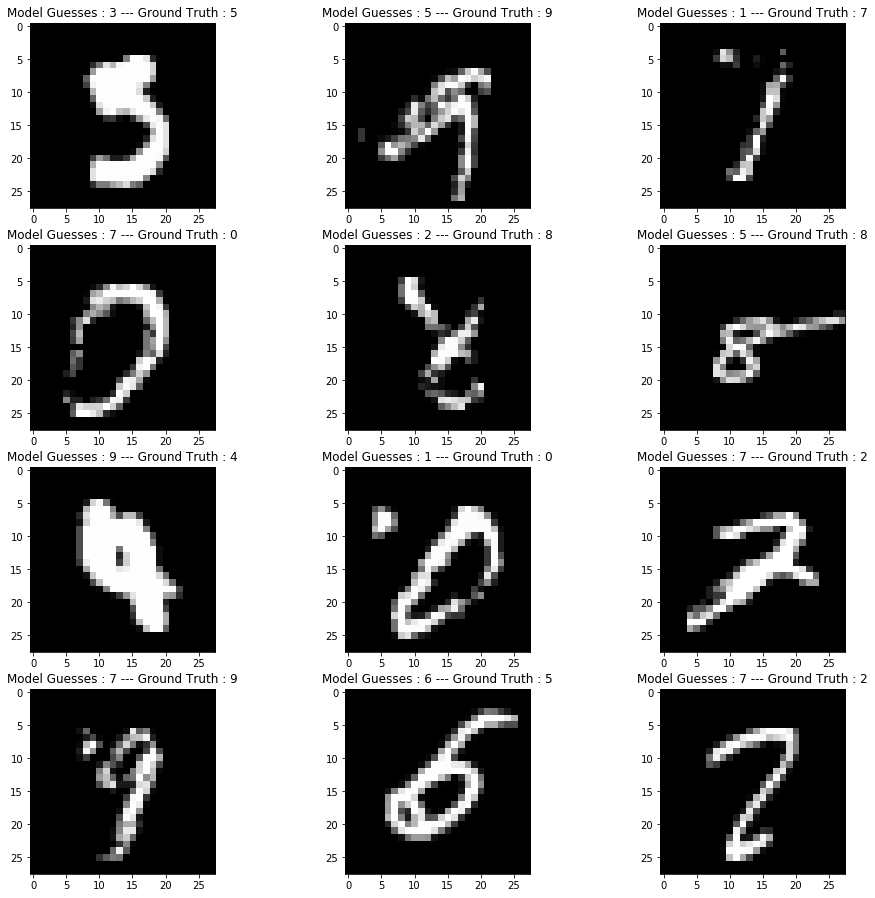

In [61]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(really_wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_5.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Badly Misclassified    
***

# <br><center>Examples Below Are Closer But Still Wrong
***

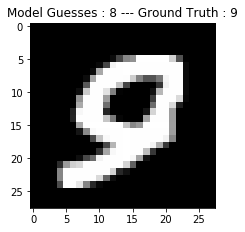

In [62]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(wrong_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_5.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
***
***
***

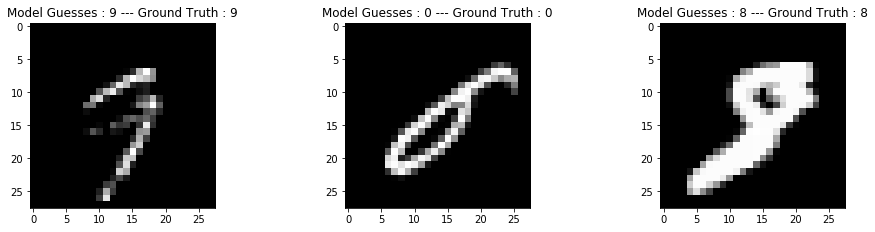

In [63]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16, 32))

for i, ex in enumerate(right_but_barely_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_5.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

***
# <br><center>Examples Above Are Close To Being Misclassified    
***

# <br><center>Examples Below Are Confidently Correctly Classified
***

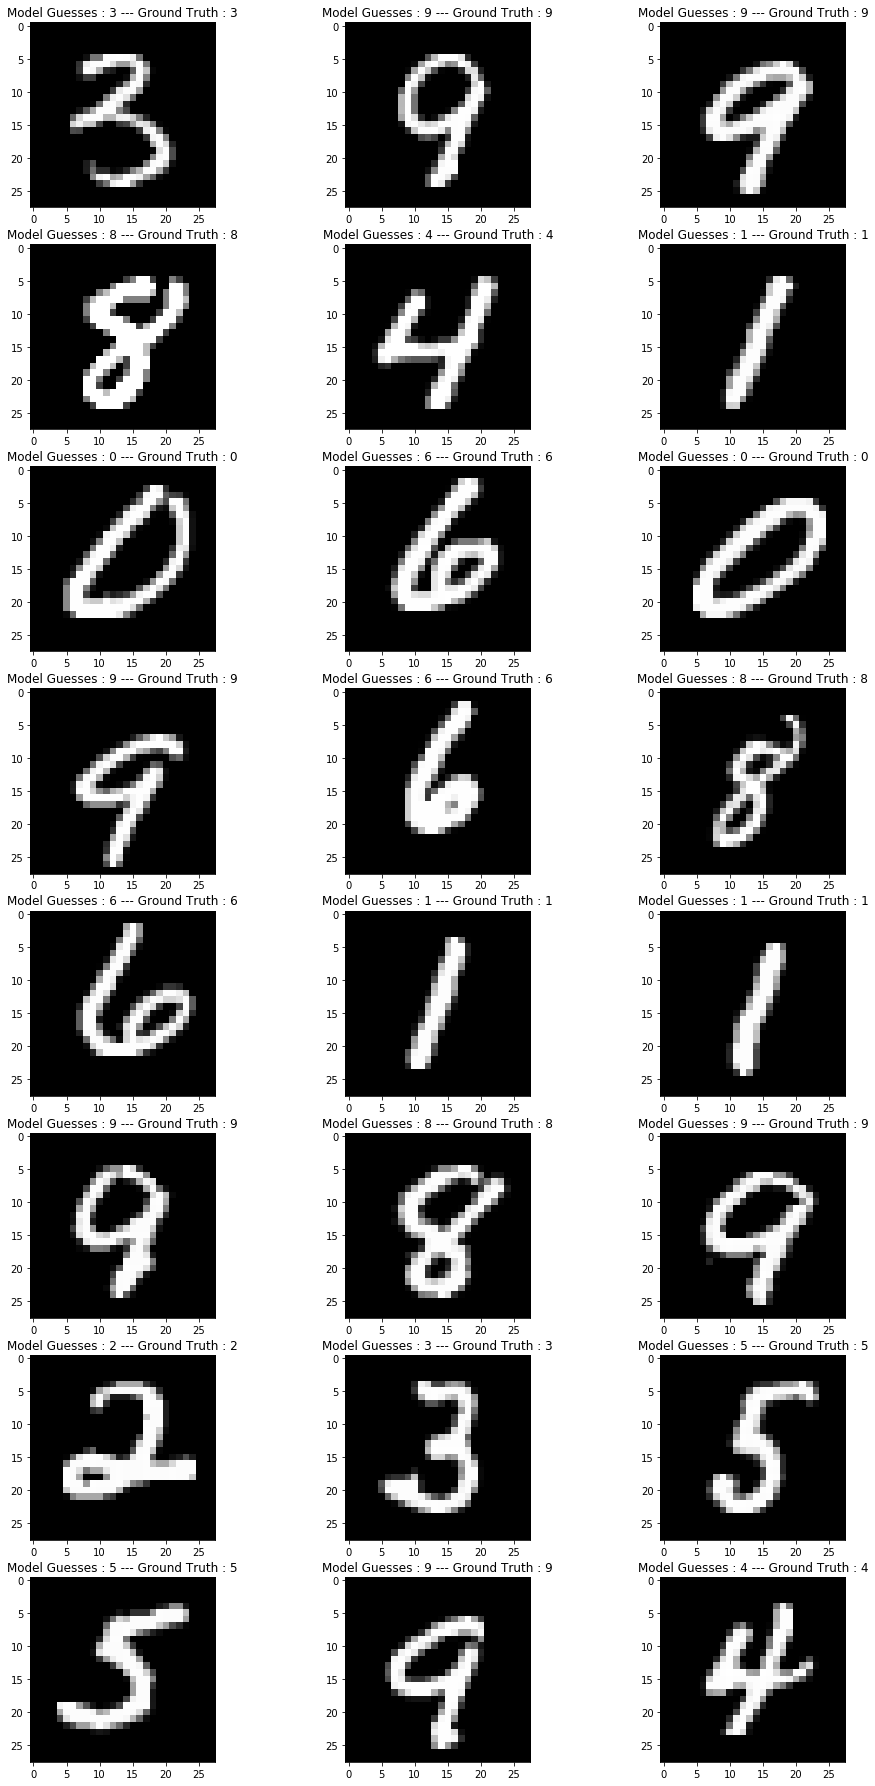

In [64]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16,32))

for i, ex in enumerate(correct_list):
    plt.subplot(8,3,(i+1))
    plt.title("Model Guesses : {} --- Ground Truth : {}".format(np.argmax(model_5.predict(np.expand_dims(x_test_cnn[ex],axis=0))), np.argmax(y_test[ex])))
    plt.imshow(np.reshape(x_test_cnn[ex],(28,28)), cmap="gray")

    if i>22:
        break

In [ ]:
# This line changes the figures (graphs) to be larger so they are easier to view
plt.figure(figsize=(16, 16))

# plt.subplot lets you plot multiple graphs...
# The arguments are plt.subplot(total_rows, total_columns, this_graph_number)
# So if you want 4 graphs two on the first line and two on the second then you'd call each plot as follows:
#
# UPPER  LEFT   PLOT = plt.subplot(2,2,1) 
# UPPER  RIGHT  PLOT = plt.subplot(2,2,2) 
# LOWER  LEFT   PLOT = plt.subplot(2,2,3) 
# LOWER  RIGHT  PLOT = plt.subplot(2,2,4) 

plt.subplot(2,2,1)
plt.plot(history_1.history['categorical_accuracy'])
plt.plot(history_2.history['categorical_accuracy'])
plt.plot(history_3.history['categorical_accuracy'])
plt.plot(history_4.history['categorical_accuracy'])
plt.plot(history_5.history['categorical_accuracy'])
plt.title('Model 5 Categorical Training Accuracy')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')

plt.subplot(2,2,2)
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_5.history['loss'])

plt.title('Model 5 Categorical Training Cross Entropy (Loss)')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch #')

plt.subplot(2,2,3)
plt.plot(history_1.history['val_categorical_accuracy'])
plt.plot(history_2.history['val_categorical_accuracy'])
plt.plot(history_3.history['val_categorical_accuracy'])
plt.plot(history_4.history['val_categorical_accuracy'])
plt.plot(history_5.history['val_categorical_accuracy'])
plt.title('Model 5 Categorical Validation Accuracy')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch #')

plt.subplot(2,2,4)
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.plot(history_5.history['val_loss'])

plt.title('Model 5 Categorical Validation Cross Entropy (Loss)')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch #')

Text(0.5,0,'Epoch #')